In [216]:
#basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_squared_log_error

In [217]:
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

In [218]:
train_df.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
id                                                                        
0     male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   female   51   161.0    64.0       7.0        84.0       39.8      29.0
3     male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [219]:
test_df.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
id                                                                  
750000    male   45   177.0    81.0       7.0        87.0       39.8
750001    male   26   200.0    97.0      20.0       101.0       40.5
750002  female   29   188.0    85.0      16.0       102.0       40.4
750003  female   39   172.0    73.0      20.0       107.0       40.6
750004  female   30   173.0    67.0      16.0        94.0       40.5

In [220]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 51.5+ MB


In [221]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         250000 non-null  object 
 1   Age         250000 non-null  int64  
 2   Height      250000 non-null  float64
 3   Weight      250000 non-null  float64
 4   Duration    250000 non-null  float64
 5   Heart_Rate  250000 non-null  float64
 6   Body_Temp   250000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 15.3+ MB


In [222]:
train_df.describe()

Age         Height         Weight       Duration  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean       41.420404     174.697685      75.145668      15.421015   
std        15.175049      12.824496      13.982704       8.354095   
min        20.000000     126.000000      36.000000       1.000000   
25%        28.000000     164.000000      63.000000       8.000000   
50%        40.000000     174.000000      74.000000      15.000000   
75%        52.000000     185.000000      87.000000      23.000000   
max        79.000000     222.000000     132.000000      30.000000   

          Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  
mean       95.483995      40.036253      88.282781  
std         9.449845       0.779875      62.395349  
min        67.000000      37.100000       1.000000  
25%        88.000000      39.600000      34.000000  
50%        95.000000      40.300000      77.000000  
75%       103.000000      40.700000     136.000000  
max       128.000000      41.500000     314.000000

### height - cm, weight - kg, temp - celcius 

### feature engineering - BMI,BMR

In [223]:
train_df.isna().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [224]:
test_df.isna().sum()

Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [225]:
from ydata_profiling import ProfileReport
report = ProfileReport(train_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### BMI

### creating exp dataframe for new features

In [226]:
train_df_exp = pd.read_csv('train.csv',index_col=0)
test_df_exp = pd.read_csv('test.csv',index_col=0)

In [227]:
#bmi = weight(kg)/ height(m)**2
# since we have height in cm divide by 100 or multiply weight by 100**2
train_df_exp['BMI'] = train_df_exp.apply(lambda x : (x['Weight'] * 100 * 100)/(x['Height']**2),axis=1)
test_df_exp['BMI'] = test_df_exp.apply(lambda x : (x['Weight'] * 100 * 100)/(x['Height']**2),axis=1)

In [228]:
train_df_exp[0:4]

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
id                                                                           
0     male   36   189.0    82.0      26.0       101.0       41.0     150.0   
1   female   64   163.0    60.0       8.0        85.0       39.7      34.0   
2   female   51   161.0    64.0       7.0        84.0       39.8      29.0   
3     male   20   192.0    90.0      25.0       105.0       40.7     140.0   

          BMI  
id             
0   22.955684  
1   22.582709  
2   24.690405  
3   24.414062

In [229]:
#testing BMI values 
heights = train_df_exp[0:4]['Height']/100
weights = train_df[0:4]['Weight']

In [230]:
bmi_test = weights/heights**2

In [231]:
print(bmi_test,train_df_exp[0:4]['BMI'])

id
0    22.955684
1    22.582709
2    24.690405
3    24.414062
dtype: float64 id
0    22.955684
1    22.582709
2    24.690405
3    24.414062
Name: BMI, dtype: float64


### BMR

In [232]:
train_df_exp['BMR'] = train_df_exp.apply(lambda x : (10 * x['Weight'] + 6.25 * x['Height'] - 5 * x['Age'] + 5) if x['Sex'] == 'male' else (10 * x['Weight'] + 6.25 * x['Height'] - 5 * x['Age'] -161),axis=1)
test_df_exp['BMR'] = test_df_exp.apply(lambda x : (10 * x['Weight'] + 6.25 * x['Height'] - 5 * x['Age'] + 5) if x['Sex'] == 'male' else (10 * x['Weight'] + 6.25 * x['Height'] - 5 * x['Age'] -161),axis=1)

In [233]:
train_df_exp.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories  \
id                                                                           
0     male   36   189.0    82.0      26.0       101.0       41.0     150.0   
1   female   64   163.0    60.0       8.0        85.0       39.7      34.0   
2   female   51   161.0    64.0       7.0        84.0       39.8      29.0   
3     male   20   192.0    90.0      25.0       105.0       40.7     140.0   
4   female   38   166.0    61.0      25.0       102.0       40.6     146.0   

          BMI      BMR  
id                      
0   22.955684  1826.25  
1   22.582709  1137.75  
2   24.690405  1230.25  
3   24.414062  2005.00  
4   22.136740  1296.50

In [234]:
#testing 
#for id 0  10 * w + 6.25 * h - 5*age + 5
bmr = 10 * train_df_exp[0:1]['Weight'] + 6.25 * train_df_exp[0:1]['Height'] - 5 * train_df_exp[0:1]['Age']+5

In [235]:
bmr

id
0    1826.25
dtype: float64

In [236]:
#for id 1 : 0 * w + 6.25 * h - 5*age -161
bmr = 10 * train_df_exp[1:2]['Weight'] + 6.25 * train_df_exp[1:2]['Height'] - 5 * train_df_exp[1:2]['Age']-161

In [237]:
bmr

id
1    1137.75
dtype: float64

### cardiovascular intensity per body mass

In [238]:
train_df_exp['HR/W'] = train_df_exp.apply(lambda x : x['Heart_Rate']/ x['Weight'],axis=1)
test_df_exp['HR/W'] = test_df_exp.apply(lambda x : x['Heart_Rate']/ x['Weight'],axis=1)

In [239]:
#total effort HRxDuration
train_df_exp['HR*Duration'] = train_df_exp.apply(lambda x : x['Heart_Rate'] * x['Duration'],axis=1)
test_df_exp['HR*Duration'] = test_df_exp.apply(lambda x : x['Heart_Rate'] * x['Duration'],axis=1)

### categorizing BMI

In [240]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal
    elif bmi < 30:
        return 2  # Overweight
    else:
        return 3  # Obese

train_df_exp['BMI_Category'] = train_df_exp['BMI'].apply(categorize_bmi)
test_df_exp['BMI_Category'] = test_df_exp['BMI'].apply(categorize_bmi)

### visualizations

In [241]:
test_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250000 entries, 750000 to 999999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sex           250000 non-null  object 
 1   Age           250000 non-null  int64  
 2   Height        250000 non-null  float64
 3   Weight        250000 non-null  float64
 4   Duration      250000 non-null  float64
 5   Heart_Rate    250000 non-null  float64
 6   Body_Temp     250000 non-null  float64
 7   BMI           250000 non-null  float64
 8   BMR           250000 non-null  float64
 9   HR/W          250000 non-null  float64
 10  HR*Duration   250000 non-null  float64
 11  BMI_Category  250000 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 24.8+ MB


In [242]:
train_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sex           750000 non-null  object 
 1   Age           750000 non-null  int64  
 2   Height        750000 non-null  float64
 3   Weight        750000 non-null  float64
 4   Duration      750000 non-null  float64
 5   Heart_Rate    750000 non-null  float64
 6   Body_Temp     750000 non-null  float64
 7   Calories      750000 non-null  float64
 8   BMI           750000 non-null  float64
 9   BMR           750000 non-null  float64
 10  HR/W          750000 non-null  float64
 11  HR*Duration   750000 non-null  float64
 12  BMI_Category  750000 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 80.1+ MB


In [243]:
train_df_exp['Sex'] = train_df_exp['Sex'].apply(lambda x : 1 if x == 'male' else 0 )
train_df['Sex'] = train_df['Sex'].apply(lambda x : 1 if x == 'male' else 0 )
test_df['Sex'] = test_df['Sex'].apply(lambda x : 1 if x == 'male' else 0)
test_df_exp['Sex'] = test_df_exp['Sex'].apply(lambda x : 1 if x == 'male' else 0 )

In [244]:
test_df.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
id                                                               
750000    1   45   177.0    81.0       7.0        87.0       39.8
750001    1   26   200.0    97.0      20.0       101.0       40.5
750002    0   29   188.0    85.0      16.0       102.0       40.4
750003    0   39   172.0    73.0      20.0       107.0       40.6
750004    0   30   173.0    67.0      16.0        94.0       40.5

In [245]:
def plot_box(df):
    numerical_cols = list(df.select_dtypes(include='number').columns)
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.boxplot(x='Sex',y=column,data=df,palette='rocket', linewidth=2.5, saturation=0.9,ax=ax,width=0.55)
        ax.set_title(f'Boxplot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=12)
        ax.set_ylabel('Values', color='white', fontsize=12)
        
        ax.tick_params(axis='x', colors='white', labelsize=10)
        ax.tick_params(axis='y', colors='white', labelsize=10)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

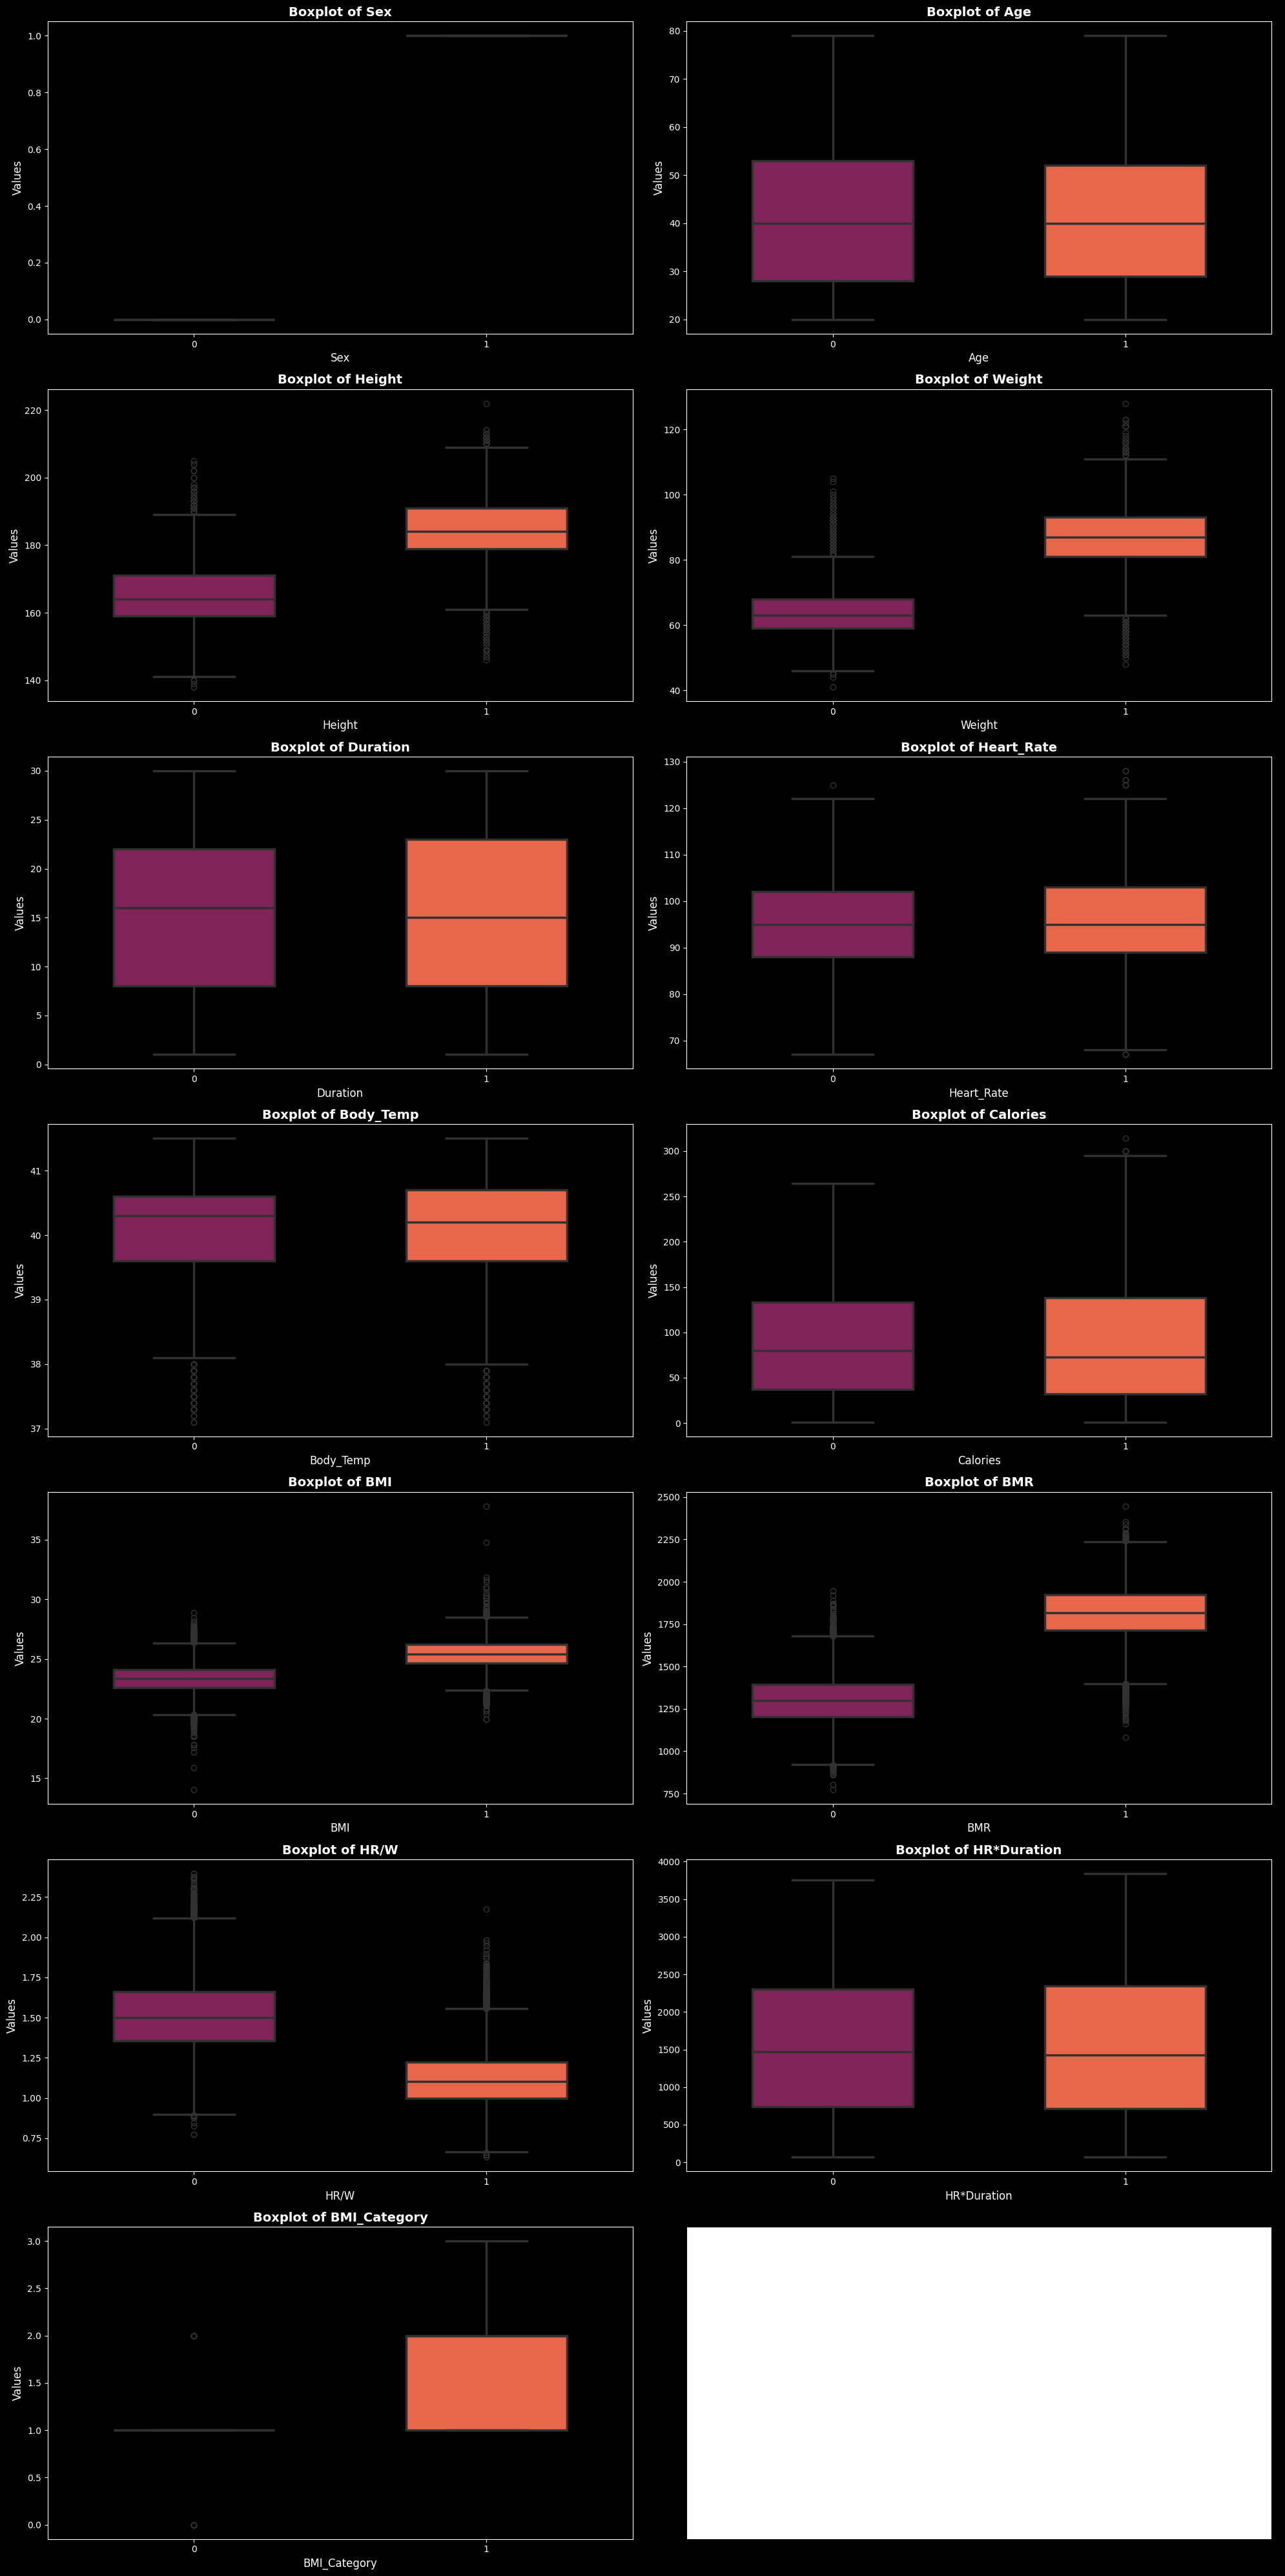

In [246]:
plot_box(train_df_exp.sample(frac=0.1))

In [247]:
def plot_hist(df):
    numerical_cols = list(df.select_dtypes(include='number').columns)
    num_plots = len(numerical_cols)
    nrows = (num_plots+1)//2
    ncols = 2
    fig, axes = plt.subplots(figsize=(20,40),nrows=nrows,ncols=ncols,facecolor='black')
    for i,column in enumerate(numerical_cols):
        row = i//2
        col = i%2
        ax = axes[row,col]
        ax.set_facecolor('black')
        sns.histplot(x=column,data=df,palette='winter',ax=ax,kde=True,alpha=0.5,bins=70,hue='Sex')
        ax.set_title(f'Displot of {column}', color='white', fontsize=14, weight='bold')
        ax.set_xlabel(f'{column}', color='white', fontsize=14)
        ax.set_ylabel('Values', color='white', fontsize=14)
        
        ax.tick_params(axis='x', colors='white', labelsize=12)
        ax.tick_params(axis='y', colors='white', labelsize=12)
        
        for spine in ax.spines.values():
            spine.set_edgecolor('white')
        
        # Handle legend if present
        legend = ax.get_legend()
        if legend is not None:
            legend.get_frame().set_facecolor('black')
            legend.get_frame().set_edgecolor('white')
            plt.setp(legend.get_texts(), color='white')
    plt.tight_layout()
    plt.show()

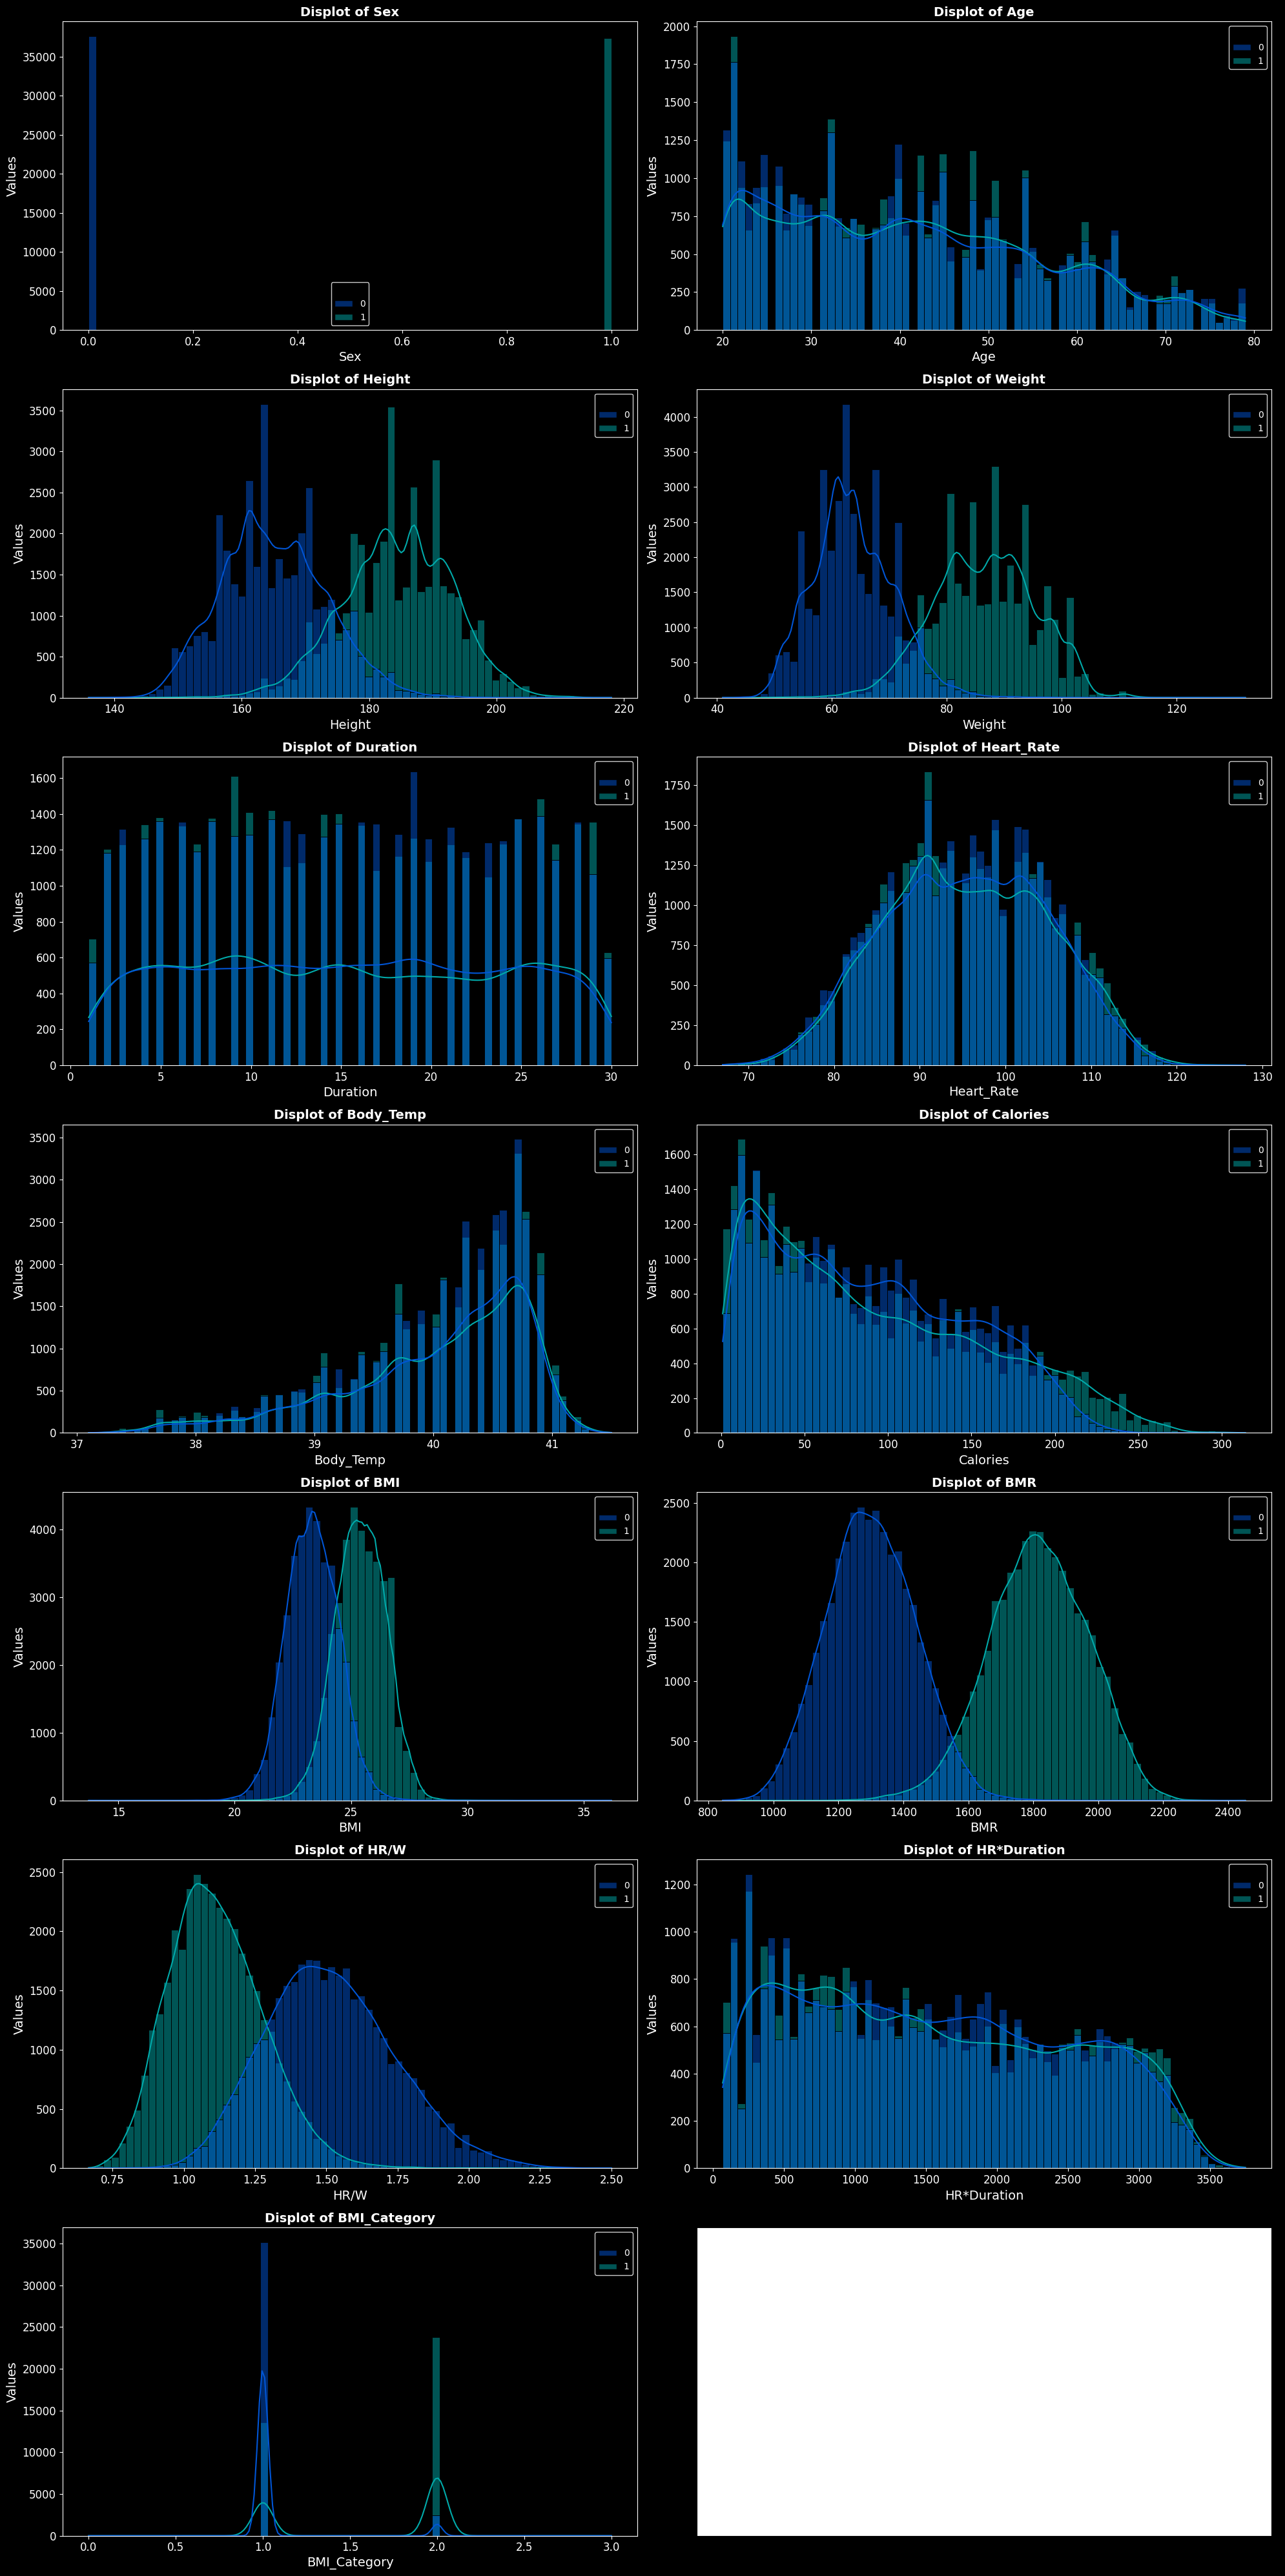

In [248]:
plot_hist(train_df_exp.sample(frac=0.1))

### scaling data

In [249]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  int64  
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
 7   Calories    750000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 67.6 MB


In [250]:
for col in train_df.columns:
    if train_df[col].dtype == 'int64':
        train_df[col] = train_df[col].astype('int8')
    else : 
        train_df[col] = train_df[col].astype('float16')

In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  int8   
 1   Age         750000 non-null  int8   
 2   Height      750000 non-null  float16
 3   Weight      750000 non-null  float16
 4   Duration    750000 non-null  float16
 5   Heart_Rate  750000 non-null  float16
 6   Body_Temp   750000 non-null  float16
 7   Calories    750000 non-null  float16
dtypes: float16(6), int8(2)
memory usage: 31.9 MB


In [252]:
train_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sex           750000 non-null  int64  
 1   Age           750000 non-null  int64  
 2   Height        750000 non-null  float64
 3   Weight        750000 non-null  float64
 4   Duration      750000 non-null  float64
 5   Heart_Rate    750000 non-null  float64
 6   Body_Temp     750000 non-null  float64
 7   Calories      750000 non-null  float64
 8   BMI           750000 non-null  float64
 9   BMR           750000 non-null  float64
 10  HR/W          750000 non-null  float64
 11  HR*Duration   750000 non-null  float64
 12  BMI_Category  750000 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 80.1 MB


In [253]:
train_df_exp.describe().T

count         mean         std         min          25%  \
Sex           750000.0     0.499039    0.499999    0.000000     0.000000   
Age           750000.0    41.420404   15.175049   20.000000    28.000000   
Height        750000.0   174.697685   12.824496  126.000000   164.000000   
Weight        750000.0    75.145668   13.982704   36.000000    63.000000   
Duration      750000.0    15.421015    8.354095    1.000000     8.000000   
Heart_Rate    750000.0    95.483995    9.449845   67.000000    88.000000   
Body_Temp     750000.0    40.036253    0.779875   37.100000    39.600000   
Calories      750000.0    88.282781   62.395349    1.000000    34.000000   
BMI           750000.0    24.374817    1.511310   12.375937    23.255019   
BMR           750000.0  1558.055613  295.489511  746.500000  1297.750000   
HR/W          750000.0     1.315996    0.281083    0.603604     1.094737   
HR*Duration   750000.0  1541.562606  932.453480   67.000000   728.000000   
BMI_Category  750000.0     1.349051    0.477249    0.000000     1.000000   

                      50%          75%          max  
Sex              0.000000     1.000000     1.000000  
Age             40.000000    52.000000    79.000000  
Height         174.000000   185.000000   222.000000  
Weight          74.000000    87.000000   132.000000  
Duration        15.000000    23.000000    30.000000  
Heart_Rate      95.000000   103.000000   128.000000  
Body_Temp       40.300000    40.700000    41.500000  
Calories        77.000000   136.000000   314.000000  
BMI             24.391059    25.487697    46.443986  
BMR           1541.250000  1817.500000  2476.250000  
HR/W             1.283951     1.508475     2.805556  
HR*Duration   1455.000000  2323.000000  3840.000000  
BMI_Category     1.000000     2.000000     3.000000

In [254]:
for col in train_df_exp.columns:
    if train_df_exp[col].dtype == 'int64':
        train_df_exp[col] = train_df_exp[col].astype('int8')
    else : 
        train_df_exp[col] = train_df_exp[col].astype('float16')

In [255]:
train_df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Sex           750000 non-null  int8   
 1   Age           750000 non-null  int8   
 2   Height        750000 non-null  float16
 3   Weight        750000 non-null  float16
 4   Duration      750000 non-null  float16
 5   Heart_Rate    750000 non-null  float16
 6   Body_Temp     750000 non-null  float16
 7   Calories      750000 non-null  float16
 8   BMI           750000 non-null  float16
 9   BMR           750000 non-null  float16
 10  HR/W          750000 non-null  float16
 11  HR*Duration   750000 non-null  float16
 12  BMI_Category  750000 non-null  int8   
dtypes: float16(10), int8(3)
memory usage: 22.2 MB


In [256]:
X_train = train_df.drop('Calories',axis=1)
X_train_exp = train_df_exp.drop('Calories',axis=1)
X_test = test_df
X_test_exp = test_df_exp
y_train = train_df['Calories']
y_train_exp = train_df_exp['Calories']

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
X_train_exp,X_val_exp,y_train_exp,y_val_exp = train_test_split(X_train_exp,y_train_exp,test_size=0.2)

In [207]:
from sklearn.preprocessing import MinMaxScaler
minmax_sclr = MinMaxScaler()
X_train = minmax_sclr.fit_transform(X_train)
X_test = minmax_sclr.transform(X_test)

In [208]:
minmax_sclr_2 = MinMaxScaler()
X_train_exp = minmax_sclr_2.fit_transform(X_train_exp)
X_test_exp = minmax_sclr_2.transform(X_test_exp)

### training

In [209]:
def train_model(name,model,X_train=X_train,y_train=y_train,X_val=X_val,y_val=y_val,X_test=X_test):
    #fit the model
    print(name,"\n")
    model.fit(X_train,y_train)
    #make prediction
    pred_val = model.predict(X_val)
    #metrics display
    print(f"Mean Absolute Error [MAE] : {mean_absolute_error(y_val,pred_val)}")
    print(f"Root Mean Squared Error [RMSE] : {np.sqrt(mean_squared_error(y_val,pred_val))}")
    print(f"R2 Score : {r2_score(y_val,pred_val)}")
    #prediction on test set
    pred_test = model.predict(X_test)
    #convert to csv
    new_test_df = pd.read_csv("test.csv")
    pred_df = pd.DataFrame(pred_test,columns=["Calories"])
    pred_df = pd.concat([pred_df,new_test_df['id']],axis=1)
    pred_df.set_index("id",inplace=True)
    pred_df.to_csv("ps_s5_e5_"+str(name)+".csv")
    print("\n")

In [210]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.svm import SVR

In [211]:
model_list = [DecisionTreeRegressor(),RandomForestRegressor(),LinearRegression(),LassoCV(),RidgeCV()]
for model in model_list:
    #on normal data
    train_model(str(model)[:-2],model)
    #on exp data
    train_model(f"{str(model)[:-2]}_exp",model,X_train_exp,y_train_exp,X_val_exp,y_val_exp,X_test_exp)

DecisionTreeRegressor 

Mean Absolute Error [MAE] : 218.43126
Root Mean Squared Error [RMSE] : 227.29276358916488
R2 Score : -12.208321123032997


DecisionTreeRegressor_exp 

Mean Absolute Error [MAE] : 197.24362
Root Mean Squared Error [RMSE] : 207.46178152453365
R2 Score : -10.020409629366693


RandomForestRegressor 

Mean Absolute Error [MAE] : 198.5104457333333
Root Mean Squared Error [RMSE] : 208.6349246669854
R2 Score : -10.128853348264784


RandomForestRegressor_exp 

Mean Absolute Error [MAE] : 196.86177373333334
Root Mean Squared Error [RMSE] : 207.00108433722113
R2 Score : -9.971519327578704


LinearRegression 

Mean Absolute Error [MAE] : 11920.0
Root Mean Squared Error [RMSE] : inf
R2 Score : nan


LinearRegression_exp 



ValueError: Input contains infinity or a value too large for dtype('float16').

### catboost

In [212]:
#baseline
from catboost import CatBoostRegressor
cat_reg = CatBoostRegressor()
train_model("catboost",cat_reg)

catboost 

Learning rate set to 0.112494
0:	learn: 55.8361095	total: 16.1ms	remaining: 16.1s
1:	learn: 50.0820238	total: 28.4ms	remaining: 14.2s
2:	learn: 44.9631046	total: 39.7ms	remaining: 13.2s
3:	learn: 40.3517698	total: 50.9ms	remaining: 12.7s
4:	learn: 36.2864985	total: 60.9ms	remaining: 12.1s
5:	learn: 32.6698882	total: 70.6ms	remaining: 11.7s
6:	learn: 29.4439878	total: 81.3ms	remaining: 11.5s
7:	learn: 26.5765070	total: 91.6ms	remaining: 11.4s
8:	learn: 24.0500348	total: 101ms	remaining: 11.2s
9:	learn: 21.7862537	total: 111ms	remaining: 11s
10:	learn: 19.7650428	total: 121ms	remaining: 10.9s
11:	learn: 17.9749596	total: 130ms	remaining: 10.7s
12:	learn: 16.4090398	total: 141ms	remaining: 10.7s
13:	learn: 14.9751836	total: 152ms	remaining: 10.7s
14:	learn: 13.7261014	total: 162ms	remaining: 10.7s
15:	learn: 12.6102571	total: 173ms	remaining: 10.6s
16:	learn: 11.6256853	total: 186ms	remaining: 10.7s
17:	learn: 10.7541132	total: 197ms	remaining: 10.7s
18:	learn: 9.9908909	total:

166:	learn: 3.6156776	total: 1.78s	remaining: 8.88s
167:	learn: 3.6144339	total: 1.79s	remaining: 8.87s
168:	learn: 3.6127102	total: 1.8s	remaining: 8.84s
169:	learn: 3.6112467	total: 1.81s	remaining: 8.83s
170:	learn: 3.6095739	total: 1.82s	remaining: 8.81s
171:	learn: 3.6078374	total: 1.83s	remaining: 8.79s
172:	learn: 3.6065001	total: 1.84s	remaining: 8.78s
173:	learn: 3.6042515	total: 1.85s	remaining: 8.77s
174:	learn: 3.6028748	total: 1.86s	remaining: 8.76s
175:	learn: 3.6021367	total: 1.87s	remaining: 8.75s
176:	learn: 3.5999754	total: 1.88s	remaining: 8.75s
177:	learn: 3.5983124	total: 1.89s	remaining: 8.74s
178:	learn: 3.5966704	total: 1.91s	remaining: 8.74s
179:	learn: 3.5951786	total: 1.92s	remaining: 8.74s
180:	learn: 3.5936490	total: 1.93s	remaining: 8.73s
181:	learn: 3.5926119	total: 1.94s	remaining: 8.73s
182:	learn: 3.5909711	total: 1.95s	remaining: 8.72s
183:	learn: 3.5893288	total: 1.96s	remaining: 8.71s
184:	learn: 3.5883535	total: 1.97s	remaining: 8.69s
185:	learn: 3

326:	learn: 3.4753013	total: 3.42s	remaining: 7.04s
327:	learn: 3.4749084	total: 3.43s	remaining: 7.02s
328:	learn: 3.4744915	total: 3.44s	remaining: 7.01s
329:	learn: 3.4739834	total: 3.45s	remaining: 7s
330:	learn: 3.4736487	total: 3.46s	remaining: 6.99s
331:	learn: 3.4729622	total: 3.47s	remaining: 6.97s
332:	learn: 3.4723376	total: 3.48s	remaining: 6.96s
333:	learn: 3.4718205	total: 3.48s	remaining: 6.95s
334:	learn: 3.4715218	total: 3.49s	remaining: 6.93s
335:	learn: 3.4710639	total: 3.5s	remaining: 6.92s
336:	learn: 3.4704011	total: 3.51s	remaining: 6.91s
337:	learn: 3.4700220	total: 3.52s	remaining: 6.9s
338:	learn: 3.4696714	total: 3.53s	remaining: 6.88s
339:	learn: 3.4691808	total: 3.54s	remaining: 6.87s
340:	learn: 3.4688344	total: 3.55s	remaining: 6.86s
341:	learn: 3.4684465	total: 3.56s	remaining: 6.85s
342:	learn: 3.4681716	total: 3.57s	remaining: 6.83s
343:	learn: 3.4678281	total: 3.58s	remaining: 6.82s
344:	learn: 3.4674450	total: 3.59s	remaining: 6.81s
345:	learn: 3.467

504:	learn: 3.4151664	total: 5.06s	remaining: 4.96s
505:	learn: 3.4149539	total: 5.07s	remaining: 4.95s
506:	learn: 3.4147251	total: 5.08s	remaining: 4.94s
507:	learn: 3.4145271	total: 5.09s	remaining: 4.93s
508:	learn: 3.4142953	total: 5.1s	remaining: 4.92s
509:	learn: 3.4140005	total: 5.11s	remaining: 4.91s
510:	learn: 3.4137933	total: 5.12s	remaining: 4.9s
511:	learn: 3.4135780	total: 5.13s	remaining: 4.89s
512:	learn: 3.4132442	total: 5.14s	remaining: 4.88s
513:	learn: 3.4130296	total: 5.15s	remaining: 4.87s
514:	learn: 3.4127479	total: 5.16s	remaining: 4.86s
515:	learn: 3.4125682	total: 5.17s	remaining: 4.84s
516:	learn: 3.4123428	total: 5.18s	remaining: 4.84s
517:	learn: 3.4121646	total: 5.19s	remaining: 4.83s
518:	learn: 3.4117894	total: 5.2s	remaining: 4.82s
519:	learn: 3.4117363	total: 5.21s	remaining: 4.8s
520:	learn: 3.4114738	total: 5.21s	remaining: 4.79s
521:	learn: 3.4111442	total: 5.22s	remaining: 4.78s
522:	learn: 3.4108168	total: 5.23s	remaining: 4.77s
523:	learn: 3.41

685:	learn: 3.3773053	total: 6.71s	remaining: 3.07s
686:	learn: 3.3771079	total: 6.72s	remaining: 3.06s
687:	learn: 3.3769946	total: 6.73s	remaining: 3.05s
688:	learn: 3.3768354	total: 6.73s	remaining: 3.04s
689:	learn: 3.3767128	total: 6.74s	remaining: 3.03s
690:	learn: 3.3765610	total: 6.75s	remaining: 3.02s
691:	learn: 3.3763930	total: 6.76s	remaining: 3.01s
692:	learn: 3.3763052	total: 6.77s	remaining: 3s
693:	learn: 3.3760125	total: 6.78s	remaining: 2.99s
694:	learn: 3.3758794	total: 6.79s	remaining: 2.98s
695:	learn: 3.3757163	total: 6.8s	remaining: 2.97s
696:	learn: 3.3756154	total: 6.81s	remaining: 2.96s
697:	learn: 3.3753925	total: 6.82s	remaining: 2.95s
698:	learn: 3.3752889	total: 6.82s	remaining: 2.94s
699:	learn: 3.3750817	total: 6.83s	remaining: 2.93s
700:	learn: 3.3749390	total: 6.84s	remaining: 2.92s
701:	learn: 3.3747924	total: 6.85s	remaining: 2.91s
702:	learn: 3.3746363	total: 6.86s	remaining: 2.9s
703:	learn: 3.3745152	total: 6.87s	remaining: 2.89s
704:	learn: 3.374

853:	learn: 3.3523593	total: 8.35s	remaining: 1.43s
854:	learn: 3.3520668	total: 8.36s	remaining: 1.42s
855:	learn: 3.3518693	total: 8.37s	remaining: 1.41s
856:	learn: 3.3517848	total: 8.38s	remaining: 1.4s
857:	learn: 3.3516266	total: 8.39s	remaining: 1.39s
858:	learn: 3.3515128	total: 8.4s	remaining: 1.38s
859:	learn: 3.3514053	total: 8.41s	remaining: 1.37s
860:	learn: 3.3512603	total: 8.43s	remaining: 1.36s
861:	learn: 3.3511588	total: 8.44s	remaining: 1.35s
862:	learn: 3.3510287	total: 8.45s	remaining: 1.34s
863:	learn: 3.3508453	total: 8.46s	remaining: 1.33s
864:	learn: 3.3507955	total: 8.46s	remaining: 1.32s
865:	learn: 3.3506929	total: 8.47s	remaining: 1.31s
866:	learn: 3.3505335	total: 8.49s	remaining: 1.3s
867:	learn: 3.3503430	total: 8.5s	remaining: 1.29s
868:	learn: 3.3501441	total: 8.51s	remaining: 1.28s
869:	learn: 3.3500285	total: 8.52s	remaining: 1.27s
870:	learn: 3.3499320	total: 8.53s	remaining: 1.26s
871:	learn: 3.3498757	total: 8.54s	remaining: 1.25s
872:	learn: 3.34

In [257]:
cat_reg_exp = CatBoostRegressor()
train_model("catboost_exp",cat_reg_exp,X_train_exp,y_train_exp,X_val_exp,y_val_exp,X_test_exp)

catboost_exp 

Learning rate set to 0.11653
0:	learn: 55.6349476	total: 20.3ms	remaining: 20.3s
1:	learn: 49.6294157	total: 34.1ms	remaining: 17s
2:	learn: 44.2605970	total: 47.4ms	remaining: 15.8s
3:	learn: 39.5199869	total: 59.6ms	remaining: 14.8s
4:	learn: 35.3739461	total: 72.9ms	remaining: 14.5s
5:	learn: 31.6733307	total: 85.8ms	remaining: 14.2s
6:	learn: 28.4005643	total: 98.3ms	remaining: 13.9s
7:	learn: 25.5159623	total: 111ms	remaining: 13.8s
8:	learn: 22.9728049	total: 122ms	remaining: 13.5s
9:	learn: 20.6804687	total: 134ms	remaining: 13.3s
10:	learn: 18.6697769	total: 147ms	remaining: 13.2s
11:	learn: 16.9289268	total: 160ms	remaining: 13.1s
12:	learn: 15.3570598	total: 171ms	remaining: 13s
13:	learn: 13.9749830	total: 184ms	remaining: 13s
14:	learn: 12.7550984	total: 196ms	remaining: 12.9s
15:	learn: 11.6754453	total: 208ms	remaining: 12.8s
16:	learn: 10.7318167	total: 220ms	remaining: 12.7s
17:	learn: 9.8999850	total: 231ms	remaining: 12.6s
18:	learn: 9.1708768	total: 24

172:	learn: 3.6617081	total: 2s	remaining: 9.58s
173:	learn: 3.6597749	total: 2.02s	remaining: 9.57s
174:	learn: 3.6583494	total: 2.03s	remaining: 9.55s
175:	learn: 3.6578137	total: 2.04s	remaining: 9.54s
176:	learn: 3.6565766	total: 2.05s	remaining: 9.53s
177:	learn: 3.6549560	total: 2.06s	remaining: 9.52s
178:	learn: 3.6535101	total: 2.07s	remaining: 9.51s
179:	learn: 3.6517347	total: 2.08s	remaining: 9.49s
180:	learn: 3.6501147	total: 2.1s	remaining: 9.49s
181:	learn: 3.6488277	total: 2.11s	remaining: 9.47s
182:	learn: 3.6472898	total: 2.12s	remaining: 9.46s
183:	learn: 3.6458697	total: 2.13s	remaining: 9.46s
184:	learn: 3.6438994	total: 2.14s	remaining: 9.44s
185:	learn: 3.6428462	total: 2.15s	remaining: 9.43s
186:	learn: 3.6420546	total: 2.16s	remaining: 9.41s
187:	learn: 3.6409997	total: 2.17s	remaining: 9.39s
188:	learn: 3.6394477	total: 2.19s	remaining: 9.38s
189:	learn: 3.6382709	total: 2.2s	remaining: 9.37s
190:	learn: 3.6373386	total: 2.21s	remaining: 9.35s
191:	learn: 3.636

333:	learn: 3.5250483	total: 3.87s	remaining: 7.72s
334:	learn: 3.5244208	total: 3.89s	remaining: 7.71s
335:	learn: 3.5240660	total: 3.9s	remaining: 7.7s
336:	learn: 3.5235398	total: 3.91s	remaining: 7.69s
337:	learn: 3.5230353	total: 3.92s	remaining: 7.68s
338:	learn: 3.5221637	total: 3.93s	remaining: 7.66s
339:	learn: 3.5218581	total: 3.94s	remaining: 7.65s
340:	learn: 3.5215016	total: 3.95s	remaining: 7.64s
341:	learn: 3.5211109	total: 3.96s	remaining: 7.63s
342:	learn: 3.5203187	total: 3.98s	remaining: 7.62s
343:	learn: 3.5199669	total: 3.99s	remaining: 7.6s
344:	learn: 3.5193731	total: 4s	remaining: 7.59s
345:	learn: 3.5189160	total: 4.01s	remaining: 7.58s
346:	learn: 3.5184096	total: 4.02s	remaining: 7.57s
347:	learn: 3.5179987	total: 4.03s	remaining: 7.55s
348:	learn: 3.5175230	total: 4.04s	remaining: 7.54s
349:	learn: 3.5169309	total: 4.06s	remaining: 7.53s
350:	learn: 3.5165570	total: 4.07s	remaining: 7.52s
351:	learn: 3.5161517	total: 4.08s	remaining: 7.51s
352:	learn: 3.5155

507:	learn: 3.4585038	total: 5.95s	remaining: 5.76s
508:	learn: 3.4582788	total: 5.96s	remaining: 5.75s
509:	learn: 3.4579816	total: 5.97s	remaining: 5.73s
510:	learn: 3.4577317	total: 5.98s	remaining: 5.72s
511:	learn: 3.4574851	total: 5.99s	remaining: 5.71s
512:	learn: 3.4572387	total: 6s	remaining: 5.7s
513:	learn: 3.4569522	total: 6.01s	remaining: 5.69s
514:	learn: 3.4566319	total: 6.03s	remaining: 5.67s
515:	learn: 3.4562617	total: 6.04s	remaining: 5.66s
516:	learn: 3.4559690	total: 6.05s	remaining: 5.65s
517:	learn: 3.4556337	total: 6.06s	remaining: 5.64s
518:	learn: 3.4554010	total: 6.07s	remaining: 5.63s
519:	learn: 3.4549517	total: 6.08s	remaining: 5.61s
520:	learn: 3.4547045	total: 6.09s	remaining: 5.6s
521:	learn: 3.4544909	total: 6.11s	remaining: 5.59s
522:	learn: 3.4543122	total: 6.12s	remaining: 5.58s
523:	learn: 3.4540830	total: 6.13s	remaining: 5.57s
524:	learn: 3.4538000	total: 6.14s	remaining: 5.55s
525:	learn: 3.4535282	total: 6.15s	remaining: 5.54s
526:	learn: 3.453

668:	learn: 3.4196665	total: 7.8s	remaining: 3.86s
669:	learn: 3.4195322	total: 7.82s	remaining: 3.85s
670:	learn: 3.4193113	total: 7.83s	remaining: 3.84s
671:	learn: 3.4191042	total: 7.84s	remaining: 3.83s
672:	learn: 3.4189529	total: 7.85s	remaining: 3.81s
673:	learn: 3.4187789	total: 7.86s	remaining: 3.8s
674:	learn: 3.4186267	total: 7.87s	remaining: 3.79s
675:	learn: 3.4184409	total: 7.88s	remaining: 3.78s
676:	learn: 3.4183005	total: 7.9s	remaining: 3.77s
677:	learn: 3.4181268	total: 7.91s	remaining: 3.75s
678:	learn: 3.4180072	total: 7.92s	remaining: 3.74s
679:	learn: 3.4177771	total: 7.93s	remaining: 3.73s
680:	learn: 3.4176426	total: 7.94s	remaining: 3.72s
681:	learn: 3.4175105	total: 7.95s	remaining: 3.71s
682:	learn: 3.4173073	total: 7.96s	remaining: 3.7s
683:	learn: 3.4171234	total: 7.98s	remaining: 3.69s
684:	learn: 3.4168444	total: 7.99s	remaining: 3.67s
685:	learn: 3.4167218	total: 8s	remaining: 3.66s
686:	learn: 3.4164853	total: 8.01s	remaining: 3.65s
687:	learn: 3.41608

830:	learn: 3.3908680	total: 9.66s	remaining: 1.96s
831:	learn: 3.3907199	total: 9.67s	remaining: 1.95s
832:	learn: 3.3902961	total: 9.68s	remaining: 1.94s
833:	learn: 3.3901957	total: 9.69s	remaining: 1.93s
834:	learn: 3.3900624	total: 9.7s	remaining: 1.92s
835:	learn: 3.3898122	total: 9.71s	remaining: 1.91s
836:	learn: 3.3896063	total: 9.73s	remaining: 1.89s
837:	learn: 3.3894704	total: 9.74s	remaining: 1.88s
838:	learn: 3.3893932	total: 9.75s	remaining: 1.87s
839:	learn: 3.3891314	total: 9.76s	remaining: 1.86s
840:	learn: 3.3889539	total: 9.77s	remaining: 1.85s
841:	learn: 3.3888121	total: 9.79s	remaining: 1.84s
842:	learn: 3.3886221	total: 9.8s	remaining: 1.82s
843:	learn: 3.3883869	total: 9.81s	remaining: 1.81s
844:	learn: 3.3882099	total: 9.82s	remaining: 1.8s
845:	learn: 3.3880901	total: 9.83s	remaining: 1.79s
846:	learn: 3.3880184	total: 9.84s	remaining: 1.78s
847:	learn: 3.3878941	total: 9.85s	remaining: 1.76s
848:	learn: 3.3878021	total: 9.86s	remaining: 1.75s
849:	learn: 3.3

993:	learn: 3.3660409	total: 11.5s	remaining: 69.5ms
994:	learn: 3.3659175	total: 11.5s	remaining: 57.9ms
995:	learn: 3.3658666	total: 11.5s	remaining: 46.3ms
996:	learn: 3.3656707	total: 11.5s	remaining: 34.7ms
997:	learn: 3.3655167	total: 11.6s	remaining: 23.2ms
998:	learn: 3.3654199	total: 11.6s	remaining: 11.6ms
999:	learn: 3.3652724	total: 11.6s	remaining: 0us
Mean Absolute Error [MAE] : 2.1142857480484554
Root Mean Squared Error [RMSE] : 3.4212729997579614
R2 Score : 0.9970029292744544




In [258]:
ft_imp_exp = pd.DataFrame(cat_reg_exp.get_feature_importance(),index = X_train_exp.columns,columns=['Importance'])

In [259]:
ft_imp_exp

Importance
Sex             2.252760
Age            11.518430
Height          0.039062
Weight          1.049896
Duration        4.872377
Heart_Rate      8.337190
Body_Temp       0.428082
BMI             0.014354
BMR             0.560955
HR/W            0.065387
HR*Duration    70.861487
BMI_Category    0.000020

In [260]:
ft_imp = pd.DataFrame(cat_reg.feature_importances_,index=X_train.columns)

In [261]:
ft_imp

0
Sex          2.625403
Age         11.430465
Height       0.054704
Weight       1.305444
Duration    59.827670
Heart_Rate  20.579033
Body_Temp    4.177281

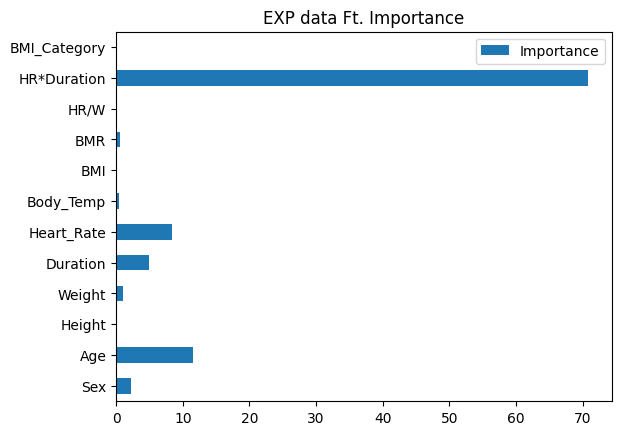

In [262]:
%matplotlib inline
ft_imp_exp.plot(kind='barh',title='EXP data Ft. Importance')
plt.show()

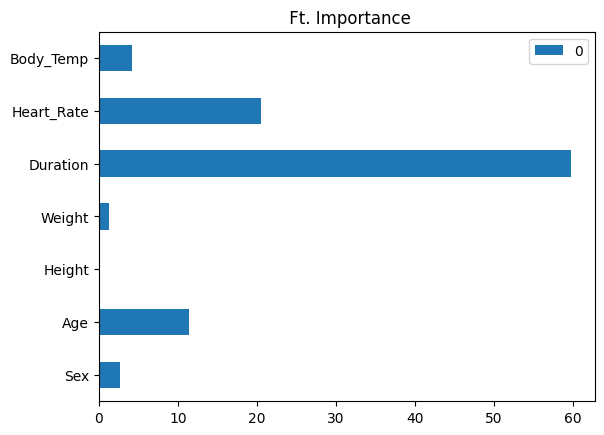

In [263]:
#duration is important, but HR*DUration is providing a better feature
%matplotlib inline
ft_imp.plot(kind='barh',title=' Ft. Importance')
plt.show()

### checking with other baseline models

In [264]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [265]:
lgbm = LGBMRegressor()
lgbm_exp = LGBMRegressor()
train_model('lgbm',lgbm)
train_model("lgbm_exp",lgbm_exp,X_train_exp,y_train_exp,X_val_exp,y_val_exp,X_test_exp)

lgbm 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 7
[LightGBM] [Info] Start training from score 88.216938
Mean Absolute Error [MAE] : 199.4934166268858
Root Mean Squared Error [RMSE] : 209.79652704208104
R2 Score : -10.253121034801655


lgbm_exp 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1381
[LightGBM] [Info] Number of data points in the train set: 750000, number of used features: 12
[LightGBM] [Info] Start training from score 88.282781
Mean Absolute Error [MAE] : 2.2968602

In [268]:
ft_imp_lgbm = pd.DataFrame(lgbm.feature_importances_,index = X_train.columns,columns=['importance'])
ft_imp_exp_lgbm = pd.DataFrame(lgbm_exp.feature_importances_,index = X_train_exp.columns,columns=['importance'])

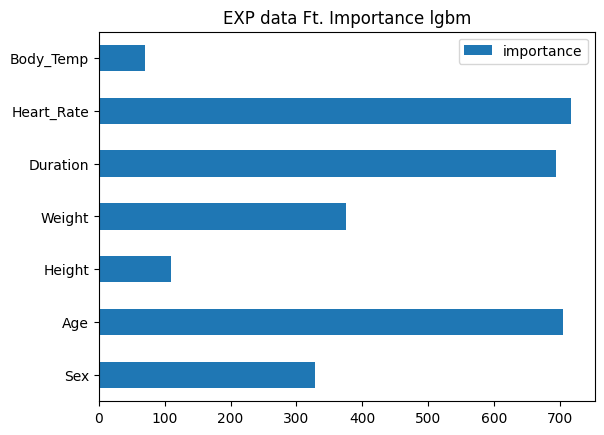

In [269]:
%matplotlib inline
ft_imp_lgbm.plot(kind='barh',title='EXP data Ft. Importance lgbm')
plt.show()

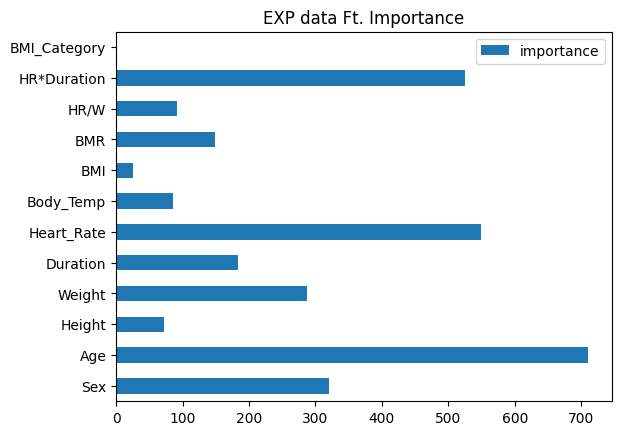

In [270]:
%matplotlib inline
ft_imp_exp_lgbm.plot(kind='barh',title='EXP data Ft. Importance')
plt.show()

In [266]:
xgb = XGBRegressor()
xgb_exp = XGBRegressor()
train_model('xgb',xgb)
train_model("xgb_exp",xgb_exp,X_train_exp,y_train_exp,X_val_exp,y_val_exp,X_test_exp)

xgb 

Mean Absolute Error [MAE] : 215.5880584716797
Root Mean Squared Error [RMSE] : 225.12684631347656
R2 Score : -11.95779037475586


xgb_exp 

Mean Absolute Error [MAE] : 2.2698097229003906
Root Mean Squared Error [RMSE] : 3.5505006313323975
R2 Score : 0.9967722296714783




In [271]:
ft_imp_xgb = pd.DataFrame(xgb.feature_importances_,index = X_train.columns,columns=['importance'])
ft_imp_exp_xgb = pd.DataFrame(xgb_exp.feature_importances_,index = X_train_exp.columns,columns=['importance'])

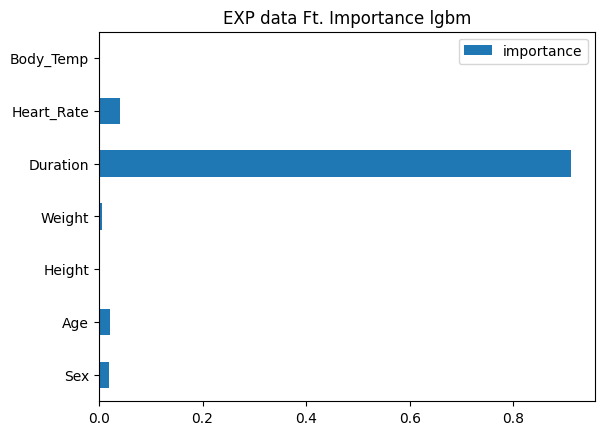

In [272]:
%matplotlib inline
ft_imp_xgb.plot(kind='barh',title='EXP data Ft. Importance lgbm')
plt.show()

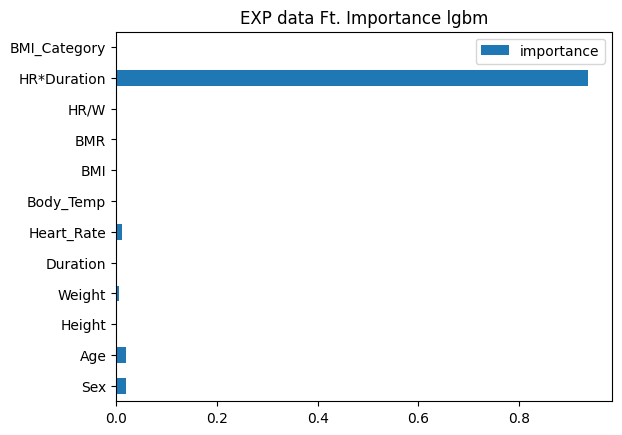

In [273]:
%matplotlib inline
ft_imp_exp_xgb.plot(kind='barh',title='EXP data Ft. Importance lgbm')
plt.show()

### overall duration and HR* Duration are most important freatures)

In [285]:
ft_imp_exp.sort_values('Importance')

Importance
BMI_Category    0.000020
BMI             0.014354
Height          0.039062
HR/W            0.065387
Body_Temp       0.428082
BMR             0.560955
Weight          1.049896
Sex             2.252760
Duration        4.872377
Heart_Rate      8.337190
Age            11.518430
HR*Duration    70.861487

In [286]:
ft_imp_exp_xgb.sort_values('importance')

importance
BMI_Category    0.000133
BMI             0.000139
Height          0.000244
Duration        0.000489
Body_Temp       0.000508
HR/W            0.001001
BMR             0.001168
Weight          0.006517
Heart_Rate      0.011978
Age             0.020049
Sex             0.020415
HR*Duration     0.937357

In [ ]:
#columns to keep - Weight sex Duration Age Heart_rate Hr*Duration

In [293]:
cols = ['Weight','Sex', 'Age','Heart_Rate','HR*Duration','Duration','Calories']
train_df_up = train_df_exp[cols]

In [294]:
test_df_up = test_df_exp[cols]

In [295]:
X_train_up = train_df_up.drop('Calories',axis=1)
X_test_up = test_df_up
y_train_up = train_df_up['Calories']

In [296]:
from sklearn.model_selection import train_test_split
X_train_up,X_val_up,y_train_up,y_val_up = train_test_split(X_train_up,y_train_up,test_size=0.2)

In [297]:
cat_reg_up = CatBoostRegressor()
train_model("cat_up",cat_reg_up,X_train_up,y_train_up,X_val_up,y_val_up,X_test_up)

cat_up 

Learning rate set to 0.112494
0:	learn: 55.8090306	total: 26.1ms	remaining: 26.1s
1:	learn: 49.9763785	total: 39.1ms	remaining: 19.5s
2:	learn: 44.7886523	total: 50.6ms	remaining: 16.8s
3:	learn: 40.1597775	total: 62.6ms	remaining: 15.6s
4:	learn: 36.1044342	total: 74.6ms	remaining: 14.8s
5:	learn: 32.4600758	total: 85ms	remaining: 14.1s
6:	learn: 29.2225670	total: 95.7ms	remaining: 13.6s
7:	learn: 26.3507208	total: 106ms	remaining: 13.2s
8:	learn: 23.7870160	total: 116ms	remaining: 12.8s
9:	learn: 21.5358122	total: 126ms	remaining: 12.5s
10:	learn: 19.5092441	total: 137ms	remaining: 12.3s
11:	learn: 17.7270815	total: 147ms	remaining: 12.1s
12:	learn: 16.1538051	total: 158ms	remaining: 12s
13:	learn: 14.7316638	total: 169ms	remaining: 11.9s
14:	learn: 13.4556659	total: 180ms	remaining: 11.8s
15:	learn: 12.3253478	total: 190ms	remaining: 11.7s
16:	learn: 11.3451250	total: 200ms	remaining: 11.6s
17:	learn: 10.4777221	total: 210ms	remaining: 11.4s
18:	learn: 9.7156656	total: 219m

170:	learn: 3.6879103	total: 2.01s	remaining: 9.75s
171:	learn: 3.6868861	total: 2.02s	remaining: 9.73s
172:	learn: 3.6855207	total: 2.03s	remaining: 9.72s
173:	learn: 3.6837634	total: 2.04s	remaining: 9.71s
174:	learn: 3.6825266	total: 2.06s	remaining: 9.69s
175:	learn: 3.6813775	total: 2.07s	remaining: 9.67s
176:	learn: 3.6801682	total: 2.08s	remaining: 9.66s
177:	learn: 3.6794438	total: 2.09s	remaining: 9.64s
178:	learn: 3.6778520	total: 2.1s	remaining: 9.62s
179:	learn: 3.6761804	total: 2.1s	remaining: 9.59s
180:	learn: 3.6745901	total: 2.12s	remaining: 9.58s
181:	learn: 3.6731751	total: 2.13s	remaining: 9.56s
182:	learn: 3.6716069	total: 2.14s	remaining: 9.54s
183:	learn: 3.6700507	total: 2.15s	remaining: 9.53s
184:	learn: 3.6687174	total: 2.16s	remaining: 9.5s
185:	learn: 3.6670010	total: 2.17s	remaining: 9.48s
186:	learn: 3.6660941	total: 2.18s	remaining: 9.46s
187:	learn: 3.6650535	total: 2.19s	remaining: 9.44s
188:	learn: 3.6639106	total: 2.19s	remaining: 9.42s
189:	learn: 3.6

344:	learn: 3.5403486	total: 3.65s	remaining: 6.92s
345:	learn: 3.5396132	total: 3.66s	remaining: 6.91s
346:	learn: 3.5386098	total: 3.67s	remaining: 6.9s
347:	learn: 3.5380313	total: 3.68s	remaining: 6.89s
348:	learn: 3.5376850	total: 3.69s	remaining: 6.88s
349:	learn: 3.5372585	total: 3.69s	remaining: 6.86s
350:	learn: 3.5368742	total: 3.7s	remaining: 6.85s
351:	learn: 3.5363003	total: 3.71s	remaining: 6.84s
352:	learn: 3.5357447	total: 3.72s	remaining: 6.82s
353:	learn: 3.5353490	total: 3.73s	remaining: 6.81s
354:	learn: 3.5346884	total: 3.74s	remaining: 6.8s
355:	learn: 3.5343503	total: 3.75s	remaining: 6.78s
356:	learn: 3.5339954	total: 3.76s	remaining: 6.77s
357:	learn: 3.5335373	total: 3.77s	remaining: 6.76s
358:	learn: 3.5331471	total: 3.78s	remaining: 6.75s
359:	learn: 3.5328089	total: 3.79s	remaining: 6.73s
360:	learn: 3.5319520	total: 3.8s	remaining: 6.72s
361:	learn: 3.5311876	total: 3.81s	remaining: 6.71s
362:	learn: 3.5307737	total: 3.82s	remaining: 6.7s
363:	learn: 3.530

517:	learn: 3.4746609	total: 5.29s	remaining: 4.92s
518:	learn: 3.4743879	total: 5.29s	remaining: 4.91s
519:	learn: 3.4737578	total: 5.3s	remaining: 4.9s
520:	learn: 3.4735052	total: 5.31s	remaining: 4.89s
521:	learn: 3.4732915	total: 5.32s	remaining: 4.88s
522:	learn: 3.4729801	total: 5.33s	remaining: 4.86s
523:	learn: 3.4726065	total: 5.34s	remaining: 4.85s
524:	learn: 3.4724376	total: 5.35s	remaining: 4.84s
525:	learn: 3.4722366	total: 5.36s	remaining: 4.83s
526:	learn: 3.4719942	total: 5.37s	remaining: 4.82s
527:	learn: 3.4715836	total: 5.38s	remaining: 4.81s
528:	learn: 3.4712724	total: 5.39s	remaining: 4.8s
529:	learn: 3.4710892	total: 5.4s	remaining: 4.79s
530:	learn: 3.4708390	total: 5.41s	remaining: 4.78s
531:	learn: 3.4705187	total: 5.42s	remaining: 4.76s
532:	learn: 3.4702464	total: 5.43s	remaining: 4.75s
533:	learn: 3.4700204	total: 5.43s	remaining: 4.74s
534:	learn: 3.4698463	total: 5.44s	remaining: 4.73s
535:	learn: 3.4696051	total: 5.45s	remaining: 4.72s
536:	learn: 3.46

686:	learn: 3.4354598	total: 6.92s	remaining: 3.15s
687:	learn: 3.4353021	total: 6.93s	remaining: 3.14s
688:	learn: 3.4352262	total: 6.94s	remaining: 3.13s
689:	learn: 3.4351059	total: 6.95s	remaining: 3.12s
690:	learn: 3.4349937	total: 6.96s	remaining: 3.11s
691:	learn: 3.4347660	total: 6.97s	remaining: 3.1s
692:	learn: 3.4345937	total: 6.98s	remaining: 3.09s
693:	learn: 3.4344026	total: 6.99s	remaining: 3.08s
694:	learn: 3.4340596	total: 7s	remaining: 3.07s
695:	learn: 3.4337141	total: 7.01s	remaining: 3.06s
696:	learn: 3.4335822	total: 7.02s	remaining: 3.05s
697:	learn: 3.4334246	total: 7.03s	remaining: 3.04s
698:	learn: 3.4333174	total: 7.03s	remaining: 3.03s
699:	learn: 3.4331408	total: 7.04s	remaining: 3.02s
700:	learn: 3.4329360	total: 7.05s	remaining: 3.01s
701:	learn: 3.4327775	total: 7.06s	remaining: 3s
702:	learn: 3.4326141	total: 7.07s	remaining: 2.99s
703:	learn: 3.4324352	total: 7.08s	remaining: 2.98s
704:	learn: 3.4321680	total: 7.09s	remaining: 2.97s
705:	learn: 3.43206

856:	learn: 3.4069408	total: 8.55s	remaining: 1.43s
857:	learn: 3.4068690	total: 8.56s	remaining: 1.42s
858:	learn: 3.4067106	total: 8.57s	remaining: 1.41s
859:	learn: 3.4065607	total: 8.58s	remaining: 1.4s
860:	learn: 3.4063177	total: 8.59s	remaining: 1.39s
861:	learn: 3.4062010	total: 8.6s	remaining: 1.38s
862:	learn: 3.4060304	total: 8.6s	remaining: 1.36s
863:	learn: 3.4058845	total: 8.61s	remaining: 1.35s
864:	learn: 3.4057767	total: 8.62s	remaining: 1.34s
865:	learn: 3.4056493	total: 8.63s	remaining: 1.33s
866:	learn: 3.4055105	total: 8.64s	remaining: 1.32s
867:	learn: 3.4053111	total: 8.65s	remaining: 1.31s
868:	learn: 3.4050519	total: 8.66s	remaining: 1.3s
869:	learn: 3.4048327	total: 8.67s	remaining: 1.29s
870:	learn: 3.4046845	total: 8.68s	remaining: 1.28s
871:	learn: 3.4045122	total: 8.69s	remaining: 1.27s
872:	learn: 3.4043186	total: 8.7s	remaining: 1.26s
873:	learn: 3.4041376	total: 8.71s	remaining: 1.25s
874:	learn: 3.4040723	total: 8.71s	remaining: 1.24s
875:	learn: 3.403

In [298]:
xgb_up = XGBRegressor()
train_model("xgb_up",xgb_up,X_train_up,y_train_up,X_val_up,y_val_up,X_test_up)

xgb_up 

Mean Absolute Error [MAE] : 2.3007454872131348
Root Mean Squared Error [RMSE] : 3.707956314086914
R2 Score : 0.9964776039123535




In [299]:
lgbm_up = LGBMRegressor()
train_model("lgbm_up",lgbm_up,X_train_up,y_train_up,X_val_up,y_val_up,X_test_up)

lgbm_up 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 6
[LightGBM] [Info] Start training from score 88.194148
Mean Absolute Error [MAE] : 2.3096778974856913
Root Mean Squared Error [RMSE] : 3.732880024342243
R2 Score : 0.9964300840754983




In [307]:
from sklearn.ensemble import StackingRegressor
estimators = [('cat',CatBoostRegressor()),
             ('lgbm',LGBMRegressor()),
             ('xgb',XGBRegressor())]
meta = RandomForestRegressor()
stck = StackingRegressor(estimators,meta)

In [308]:
train_model("stck_up",stck,X_train_up,y_train_up,X_val_up,y_val_up,X_test_up)

stck_up 

Learning rate set to 0.112494
0:	learn: 55.8090306	total: 16.4ms	remaining: 16.4s
1:	learn: 49.9763785	total: 29.7ms	remaining: 14.8s
2:	learn: 44.7886523	total: 42.1ms	remaining: 14s
3:	learn: 40.1597775	total: 52.4ms	remaining: 13.1s
4:	learn: 36.1044342	total: 63.2ms	remaining: 12.6s
5:	learn: 32.4600758	total: 73.9ms	remaining: 12.2s
6:	learn: 29.2225670	total: 83.9ms	remaining: 11.9s
7:	learn: 26.3507208	total: 94ms	remaining: 11.7s
8:	learn: 23.7870160	total: 105ms	remaining: 11.5s
9:	learn: 21.5358122	total: 115ms	remaining: 11.3s
10:	learn: 19.5092441	total: 125ms	remaining: 11.2s
11:	learn: 17.7270815	total: 135ms	remaining: 11.1s
12:	learn: 16.1538051	total: 146ms	remaining: 11.1s
13:	learn: 14.7316638	total: 156ms	remaining: 11s
14:	learn: 13.4556659	total: 166ms	remaining: 10.9s
15:	learn: 12.3253478	total: 177ms	remaining: 10.9s
16:	learn: 11.3451250	total: 188ms	remaining: 10.9s
17:	learn: 10.4777221	total: 198ms	remaining: 10.8s
18:	learn: 9.7156656	total: 209m

167:	learn: 3.6911107	total: 1.78s	remaining: 8.83s
168:	learn: 3.6904280	total: 1.79s	remaining: 8.82s
169:	learn: 3.6890762	total: 1.81s	remaining: 8.82s
170:	learn: 3.6879103	total: 1.82s	remaining: 8.81s
171:	learn: 3.6868861	total: 1.83s	remaining: 8.81s
172:	learn: 3.6855207	total: 1.84s	remaining: 8.81s
173:	learn: 3.6837634	total: 1.85s	remaining: 8.81s
174:	learn: 3.6825266	total: 1.87s	remaining: 8.81s
175:	learn: 3.6813775	total: 1.88s	remaining: 8.81s
176:	learn: 3.6801682	total: 1.89s	remaining: 8.81s
177:	learn: 3.6794438	total: 1.91s	remaining: 8.8s
178:	learn: 3.6778520	total: 1.92s	remaining: 8.79s
179:	learn: 3.6761804	total: 1.93s	remaining: 8.78s
180:	learn: 3.6745901	total: 1.94s	remaining: 8.77s
181:	learn: 3.6731751	total: 1.95s	remaining: 8.76s
182:	learn: 3.6716069	total: 1.96s	remaining: 8.76s
183:	learn: 3.6700507	total: 1.97s	remaining: 8.75s
184:	learn: 3.6687174	total: 1.98s	remaining: 8.74s
185:	learn: 3.6670010	total: 2s	remaining: 8.73s
186:	learn: 3.66

336:	learn: 3.5444215	total: 3.41s	remaining: 6.72s
337:	learn: 3.5437348	total: 3.42s	remaining: 6.71s
338:	learn: 3.5432880	total: 3.43s	remaining: 6.69s
339:	learn: 3.5429793	total: 3.44s	remaining: 6.68s
340:	learn: 3.5426976	total: 3.45s	remaining: 6.67s
341:	learn: 3.5420414	total: 3.46s	remaining: 6.66s
342:	learn: 3.5414893	total: 3.47s	remaining: 6.64s
343:	learn: 3.5409807	total: 3.48s	remaining: 6.63s
344:	learn: 3.5403486	total: 3.49s	remaining: 6.62s
345:	learn: 3.5396132	total: 3.5s	remaining: 6.61s
346:	learn: 3.5386098	total: 3.5s	remaining: 6.6s
347:	learn: 3.5380313	total: 3.52s	remaining: 6.59s
348:	learn: 3.5376850	total: 3.52s	remaining: 6.57s
349:	learn: 3.5372585	total: 3.53s	remaining: 6.56s
350:	learn: 3.5368742	total: 3.54s	remaining: 6.55s
351:	learn: 3.5363003	total: 3.55s	remaining: 6.53s
352:	learn: 3.5357447	total: 3.56s	remaining: 6.52s
353:	learn: 3.5353490	total: 3.57s	remaining: 6.51s
354:	learn: 3.5346884	total: 3.58s	remaining: 6.5s
355:	learn: 3.53

515:	learn: 3.4752700	total: 5.06s	remaining: 4.75s
516:	learn: 3.4749351	total: 5.07s	remaining: 4.74s
517:	learn: 3.4746609	total: 5.08s	remaining: 4.73s
518:	learn: 3.4743879	total: 5.09s	remaining: 4.72s
519:	learn: 3.4737578	total: 5.1s	remaining: 4.71s
520:	learn: 3.4735052	total: 5.11s	remaining: 4.7s
521:	learn: 3.4732915	total: 5.12s	remaining: 4.69s
522:	learn: 3.4729801	total: 5.13s	remaining: 4.68s
523:	learn: 3.4726065	total: 5.14s	remaining: 4.67s
524:	learn: 3.4724376	total: 5.15s	remaining: 4.66s
525:	learn: 3.4722366	total: 5.16s	remaining: 4.65s
526:	learn: 3.4719942	total: 5.17s	remaining: 4.64s
527:	learn: 3.4715836	total: 5.18s	remaining: 4.63s
528:	learn: 3.4712724	total: 5.19s	remaining: 4.62s
529:	learn: 3.4710892	total: 5.2s	remaining: 4.61s
530:	learn: 3.4708390	total: 5.21s	remaining: 4.6s
531:	learn: 3.4705187	total: 5.22s	remaining: 4.59s
532:	learn: 3.4702464	total: 5.23s	remaining: 4.58s
533:	learn: 3.4700204	total: 5.24s	remaining: 4.58s
534:	learn: 3.46

675:	learn: 3.4374284	total: 6.69s	remaining: 3.21s
676:	learn: 3.4372069	total: 6.7s	remaining: 3.19s
677:	learn: 3.4370270	total: 6.71s	remaining: 3.19s
678:	learn: 3.4368979	total: 6.72s	remaining: 3.17s
679:	learn: 3.4366781	total: 6.73s	remaining: 3.17s
680:	learn: 3.4364648	total: 6.74s	remaining: 3.15s
681:	learn: 3.4363284	total: 6.75s	remaining: 3.15s
682:	learn: 3.4361501	total: 6.75s	remaining: 3.13s
683:	learn: 3.4359949	total: 6.76s	remaining: 3.12s
684:	learn: 3.4358460	total: 6.77s	remaining: 3.11s
685:	learn: 3.4356404	total: 6.78s	remaining: 3.1s
686:	learn: 3.4354598	total: 6.79s	remaining: 3.09s
687:	learn: 3.4353021	total: 6.8s	remaining: 3.08s
688:	learn: 3.4352262	total: 6.81s	remaining: 3.07s
689:	learn: 3.4351059	total: 6.82s	remaining: 3.06s
690:	learn: 3.4349937	total: 6.83s	remaining: 3.05s
691:	learn: 3.4347660	total: 6.83s	remaining: 3.04s
692:	learn: 3.4345937	total: 6.84s	remaining: 3.03s
693:	learn: 3.4344026	total: 6.85s	remaining: 3.02s
694:	learn: 3.4

841:	learn: 3.4095455	total: 8.34s	remaining: 1.56s
842:	learn: 3.4094297	total: 8.34s	remaining: 1.55s
843:	learn: 3.4093414	total: 8.36s	remaining: 1.54s
844:	learn: 3.4092353	total: 8.38s	remaining: 1.54s
845:	learn: 3.4089498	total: 8.39s	remaining: 1.53s
846:	learn: 3.4087920	total: 8.41s	remaining: 1.52s
847:	learn: 3.4086201	total: 8.42s	remaining: 1.51s
848:	learn: 3.4083305	total: 8.44s	remaining: 1.5s
849:	learn: 3.4081486	total: 8.45s	remaining: 1.49s
850:	learn: 3.4079404	total: 8.46s	remaining: 1.48s
851:	learn: 3.4076524	total: 8.47s	remaining: 1.47s
852:	learn: 3.4075154	total: 8.48s	remaining: 1.46s
853:	learn: 3.4073362	total: 8.49s	remaining: 1.45s
854:	learn: 3.4071687	total: 8.51s	remaining: 1.44s
855:	learn: 3.4070257	total: 8.52s	remaining: 1.43s
856:	learn: 3.4069408	total: 8.52s	remaining: 1.42s
857:	learn: 3.4068690	total: 8.53s	remaining: 1.41s
858:	learn: 3.4067106	total: 8.54s	remaining: 1.4s
859:	learn: 3.4065607	total: 8.55s	remaining: 1.39s
860:	learn: 3.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 490
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 6
[LightGBM] [Info] Start training from score 88.194148
Learning rate set to 0.108596
0:	learn: 56.0244972	total: 10.2ms	remaining: 10.2s
1:	learn: 50.3258647	total: 18.5ms	remaining: 9.24s
2:	learn: 45.3225230	total: 26.3ms	remaining: 8.75s
3:	learn: 40.8101553	total: 33.8ms	remaining: 8.41s
4:	learn: 36.7701037	total: 45.2ms	remaining: 8.99s
5:	learn: 33.1722091	total: 53.1ms	remaining: 8.8s
6:	learn: 29.9357882	total: 60.7ms	remaining: 8.6s
7:	learn: 27.0918703	total: 68.1ms	remaining: 8.45s
8:	learn: 24.5185882	total: 76.3ms	remaining: 8.4s
9:	learn: 22.2348449	total: 84.2ms	remaining: 8.34s
10:	learn: 20.2216242	total: 92.4ms	remaining: 

162:	learn: 3.6979585	total: 1.21s	remaining: 6.24s
163:	learn: 3.6966960	total: 1.22s	remaining: 6.24s
164:	learn: 3.6951270	total: 1.23s	remaining: 6.22s
165:	learn: 3.6932619	total: 1.24s	remaining: 6.22s
166:	learn: 3.6921090	total: 1.24s	remaining: 6.21s
167:	learn: 3.6911137	total: 1.25s	remaining: 6.2s
168:	learn: 3.6893657	total: 1.26s	remaining: 6.19s
169:	learn: 3.6880968	total: 1.26s	remaining: 6.18s
170:	learn: 3.6869521	total: 1.27s	remaining: 6.17s
171:	learn: 3.6853881	total: 1.28s	remaining: 6.16s
172:	learn: 3.6836180	total: 1.29s	remaining: 6.15s
173:	learn: 3.6824425	total: 1.29s	remaining: 6.14s
174:	learn: 3.6809110	total: 1.3s	remaining: 6.13s
175:	learn: 3.6792325	total: 1.31s	remaining: 6.13s
176:	learn: 3.6777045	total: 1.32s	remaining: 6.12s
177:	learn: 3.6767038	total: 1.32s	remaining: 6.11s
178:	learn: 3.6757559	total: 1.33s	remaining: 6.1s
179:	learn: 3.6740218	total: 1.34s	remaining: 6.09s
180:	learn: 3.6734416	total: 1.34s	remaining: 6.08s
181:	learn: 3.6

333:	learn: 3.5461846	total: 2.45s	remaining: 4.88s
334:	learn: 3.5456478	total: 2.46s	remaining: 4.88s
335:	learn: 3.5451731	total: 2.46s	remaining: 4.87s
336:	learn: 3.5443797	total: 2.47s	remaining: 4.86s
337:	learn: 3.5439925	total: 2.48s	remaining: 4.85s
338:	learn: 3.5433232	total: 2.48s	remaining: 4.84s
339:	learn: 3.5428109	total: 2.49s	remaining: 4.84s
340:	learn: 3.5425833	total: 2.5s	remaining: 4.83s
341:	learn: 3.5419543	total: 2.5s	remaining: 4.82s
342:	learn: 3.5413984	total: 2.51s	remaining: 4.81s
343:	learn: 3.5407315	total: 2.52s	remaining: 4.81s
344:	learn: 3.5403737	total: 2.53s	remaining: 4.8s
345:	learn: 3.5396355	total: 2.54s	remaining: 4.79s
346:	learn: 3.5392417	total: 2.54s	remaining: 4.78s
347:	learn: 3.5387031	total: 2.55s	remaining: 4.78s
348:	learn: 3.5382222	total: 2.56s	remaining: 4.77s
349:	learn: 3.5375468	total: 2.56s	remaining: 4.76s
350:	learn: 3.5371307	total: 2.57s	remaining: 4.75s
351:	learn: 3.5366780	total: 2.58s	remaining: 4.75s
352:	learn: 3.5

506:	learn: 3.4741770	total: 3.87s	remaining: 3.77s
507:	learn: 3.4738224	total: 3.88s	remaining: 3.76s
508:	learn: 3.4735325	total: 3.89s	remaining: 3.75s
509:	learn: 3.4731123	total: 3.9s	remaining: 3.74s
510:	learn: 3.4728486	total: 3.9s	remaining: 3.74s
511:	learn: 3.4725189	total: 3.91s	remaining: 3.73s
512:	learn: 3.4722313	total: 3.92s	remaining: 3.72s
513:	learn: 3.4718648	total: 3.93s	remaining: 3.71s
514:	learn: 3.4715703	total: 3.94s	remaining: 3.71s
515:	learn: 3.4713545	total: 3.94s	remaining: 3.7s
516:	learn: 3.4708110	total: 3.95s	remaining: 3.69s
517:	learn: 3.4705869	total: 3.96s	remaining: 3.69s
518:	learn: 3.4703811	total: 3.97s	remaining: 3.68s
519:	learn: 3.4699838	total: 3.98s	remaining: 3.67s
520:	learn: 3.4696232	total: 3.98s	remaining: 3.66s
521:	learn: 3.4693506	total: 3.99s	remaining: 3.66s
522:	learn: 3.4690209	total: 4s	remaining: 3.65s
523:	learn: 3.4687862	total: 4.01s	remaining: 3.64s
524:	learn: 3.4685594	total: 4.02s	remaining: 3.63s
525:	learn: 3.4683

685:	learn: 3.4279693	total: 5.32s	remaining: 2.43s
686:	learn: 3.4277858	total: 5.32s	remaining: 2.42s
687:	learn: 3.4275104	total: 5.33s	remaining: 2.42s
688:	learn: 3.4272039	total: 5.34s	remaining: 2.41s
689:	learn: 3.4270144	total: 5.34s	remaining: 2.4s
690:	learn: 3.4267034	total: 5.35s	remaining: 2.39s
691:	learn: 3.4265252	total: 5.36s	remaining: 2.38s
692:	learn: 3.4262920	total: 5.38s	remaining: 2.38s
693:	learn: 3.4260696	total: 5.38s	remaining: 2.37s
694:	learn: 3.4258453	total: 5.39s	remaining: 2.37s
695:	learn: 3.4256403	total: 5.4s	remaining: 2.36s
696:	learn: 3.4253656	total: 5.41s	remaining: 2.35s
697:	learn: 3.4250644	total: 5.42s	remaining: 2.34s
698:	learn: 3.4248519	total: 5.42s	remaining: 2.33s
699:	learn: 3.4247622	total: 5.43s	remaining: 2.33s
700:	learn: 3.4244745	total: 5.44s	remaining: 2.32s
701:	learn: 3.4242777	total: 5.45s	remaining: 2.31s
702:	learn: 3.4239933	total: 5.45s	remaining: 2.3s
703:	learn: 3.4238148	total: 5.46s	remaining: 2.3s
704:	learn: 3.42

868:	learn: 3.3942218	total: 6.75s	remaining: 1.02s
869:	learn: 3.3941673	total: 6.75s	remaining: 1.01s
870:	learn: 3.3940106	total: 6.76s	remaining: 1s
871:	learn: 3.3938307	total: 6.77s	remaining: 993ms
872:	learn: 3.3936122	total: 6.77s	remaining: 986ms
873:	learn: 3.3934394	total: 6.78s	remaining: 978ms
874:	learn: 3.3933444	total: 6.79s	remaining: 970ms
875:	learn: 3.3932872	total: 6.79s	remaining: 962ms
876:	learn: 3.3931035	total: 6.8s	remaining: 954ms
877:	learn: 3.3930060	total: 6.81s	remaining: 946ms
878:	learn: 3.3928965	total: 6.82s	remaining: 938ms
879:	learn: 3.3926995	total: 6.82s	remaining: 930ms
880:	learn: 3.3926072	total: 6.83s	remaining: 922ms
881:	learn: 3.3924512	total: 6.83s	remaining: 915ms
882:	learn: 3.3923545	total: 6.84s	remaining: 907ms
883:	learn: 3.3921850	total: 6.85s	remaining: 899ms
884:	learn: 3.3919996	total: 6.86s	remaining: 891ms
885:	learn: 3.3918454	total: 6.86s	remaining: 883ms
886:	learn: 3.3916426	total: 6.87s	remaining: 876ms
887:	learn: 3.39

49:	learn: 4.2180378	total: 398ms	remaining: 7.57s
50:	learn: 4.1992904	total: 406ms	remaining: 7.55s
51:	learn: 4.1855246	total: 413ms	remaining: 7.53s
52:	learn: 4.1707892	total: 420ms	remaining: 7.51s
53:	learn: 4.1575621	total: 427ms	remaining: 7.48s
54:	learn: 4.1408338	total: 435ms	remaining: 7.47s
55:	learn: 4.1292711	total: 442ms	remaining: 7.44s
56:	learn: 4.1187216	total: 449ms	remaining: 7.42s
57:	learn: 4.1074697	total: 1.03s	remaining: 16.7s
58:	learn: 4.0975363	total: 1.04s	remaining: 16.7s
59:	learn: 4.0870788	total: 1.07s	remaining: 16.8s
60:	learn: 4.0739288	total: 1.09s	remaining: 16.8s
61:	learn: 4.0666739	total: 1.1s	remaining: 16.7s
62:	learn: 4.0573163	total: 1.11s	remaining: 16.6s
63:	learn: 4.0452609	total: 1.13s	remaining: 16.5s
64:	learn: 4.0362109	total: 1.14s	remaining: 16.4s
65:	learn: 4.0302296	total: 1.15s	remaining: 16.2s
66:	learn: 4.0201935	total: 1.16s	remaining: 16.1s
67:	learn: 4.0146875	total: 1.17s	remaining: 16s
68:	learn: 4.0081241	total: 1.17s	

223:	learn: 3.6138050	total: 2.48s	remaining: 8.58s
224:	learn: 3.6129925	total: 2.48s	remaining: 8.56s
225:	learn: 3.6119059	total: 2.49s	remaining: 8.54s
226:	learn: 3.6111846	total: 2.5s	remaining: 8.51s
227:	learn: 3.6101059	total: 2.51s	remaining: 8.49s
228:	learn: 3.6093858	total: 2.51s	remaining: 8.46s
229:	learn: 3.6087885	total: 2.52s	remaining: 8.44s
230:	learn: 3.6077881	total: 2.53s	remaining: 8.41s
231:	learn: 3.6068280	total: 2.54s	remaining: 8.39s
232:	learn: 3.6061757	total: 2.54s	remaining: 8.37s
233:	learn: 3.6055688	total: 2.55s	remaining: 8.35s
234:	learn: 3.6040393	total: 2.56s	remaining: 8.32s
235:	learn: 3.6033401	total: 2.56s	remaining: 8.3s
236:	learn: 3.6026291	total: 2.57s	remaining: 8.28s
237:	learn: 3.6017381	total: 2.58s	remaining: 8.26s
238:	learn: 3.6008433	total: 2.59s	remaining: 8.24s
239:	learn: 3.6000705	total: 2.6s	remaining: 8.22s
240:	learn: 3.5991737	total: 2.6s	remaining: 8.21s
241:	learn: 3.5982402	total: 2.61s	remaining: 8.18s
242:	learn: 3.59

387:	learn: 3.5146967	total: 3.7s	remaining: 5.84s
388:	learn: 3.5141816	total: 3.71s	remaining: 5.83s
389:	learn: 3.5137815	total: 3.72s	remaining: 5.82s
390:	learn: 3.5134481	total: 3.73s	remaining: 5.8s
391:	learn: 3.5129532	total: 3.73s	remaining: 5.79s
392:	learn: 3.5126386	total: 3.74s	remaining: 5.78s
393:	learn: 3.5122817	total: 3.75s	remaining: 5.76s
394:	learn: 3.5118593	total: 3.76s	remaining: 5.75s
395:	learn: 3.5115082	total: 3.76s	remaining: 5.74s
396:	learn: 3.5109727	total: 3.77s	remaining: 5.73s
397:	learn: 3.5104984	total: 3.78s	remaining: 5.71s
398:	learn: 3.5099957	total: 3.78s	remaining: 5.7s
399:	learn: 3.5096400	total: 3.79s	remaining: 5.69s
400:	learn: 3.5091130	total: 3.8s	remaining: 5.68s
401:	learn: 3.5088195	total: 3.81s	remaining: 5.66s
402:	learn: 3.5082920	total: 3.81s	remaining: 5.65s
403:	learn: 3.5079397	total: 3.82s	remaining: 5.64s
404:	learn: 3.5075012	total: 3.83s	remaining: 5.63s
405:	learn: 3.5070687	total: 3.83s	remaining: 5.61s
406:	learn: 3.50

547:	learn: 3.4619879	total: 4.93s	remaining: 4.07s
548:	learn: 3.4614882	total: 4.94s	remaining: 4.05s
549:	learn: 3.4612456	total: 4.94s	remaining: 4.04s
550:	learn: 3.4609942	total: 4.95s	remaining: 4.04s
551:	learn: 3.4608078	total: 4.96s	remaining: 4.03s
552:	learn: 3.4605955	total: 4.97s	remaining: 4.01s
553:	learn: 3.4603547	total: 4.97s	remaining: 4s
554:	learn: 3.4601128	total: 4.98s	remaining: 3.99s
555:	learn: 3.4598770	total: 4.99s	remaining: 3.98s
556:	learn: 3.4597320	total: 5s	remaining: 3.97s
557:	learn: 3.4594213	total: 5s	remaining: 3.96s
558:	learn: 3.4591944	total: 5.01s	remaining: 3.95s
559:	learn: 3.4590224	total: 5.02s	remaining: 3.94s
560:	learn: 3.4586965	total: 5.03s	remaining: 3.93s
561:	learn: 3.4584945	total: 5.03s	remaining: 3.92s
562:	learn: 3.4582358	total: 5.04s	remaining: 3.91s
563:	learn: 3.4578842	total: 5.05s	remaining: 3.9s
564:	learn: 3.4576862	total: 5.05s	remaining: 3.89s
565:	learn: 3.4574673	total: 5.06s	remaining: 3.88s
566:	learn: 3.4572153	

711:	learn: 3.4245953	total: 6.28s	remaining: 2.54s
712:	learn: 3.4243626	total: 6.29s	remaining: 2.53s
713:	learn: 3.4241471	total: 6.31s	remaining: 2.53s
714:	learn: 3.4239097	total: 6.33s	remaining: 2.52s
715:	learn: 3.4237464	total: 6.34s	remaining: 2.51s
716:	learn: 3.4235920	total: 6.34s	remaining: 2.5s
717:	learn: 3.4232726	total: 6.36s	remaining: 2.5s
718:	learn: 3.4229734	total: 6.37s	remaining: 2.49s
719:	learn: 3.4228704	total: 6.38s	remaining: 2.48s
720:	learn: 3.4226894	total: 6.39s	remaining: 2.47s
721:	learn: 3.4224881	total: 6.4s	remaining: 2.47s
722:	learn: 3.4222787	total: 6.41s	remaining: 2.46s
723:	learn: 3.4221296	total: 6.42s	remaining: 2.45s
724:	learn: 3.4218185	total: 6.43s	remaining: 2.44s
725:	learn: 3.4217027	total: 6.44s	remaining: 2.43s
726:	learn: 3.4215836	total: 6.45s	remaining: 2.42s
727:	learn: 3.4214711	total: 6.47s	remaining: 2.42s
728:	learn: 3.4213121	total: 6.48s	remaining: 2.41s
729:	learn: 3.4210559	total: 6.49s	remaining: 2.4s
730:	learn: 3.42

897:	learn: 3.3932400	total: 7.9s	remaining: 898ms
898:	learn: 3.3930596	total: 7.91s	remaining: 889ms
899:	learn: 3.3928396	total: 7.92s	remaining: 880ms
900:	learn: 3.3926706	total: 7.93s	remaining: 871ms
901:	learn: 3.3925266	total: 7.93s	remaining: 862ms
902:	learn: 3.3923595	total: 7.94s	remaining: 853ms
903:	learn: 3.3922200	total: 7.95s	remaining: 844ms
904:	learn: 3.3921065	total: 7.96s	remaining: 835ms
905:	learn: 3.3919207	total: 7.96s	remaining: 826ms
906:	learn: 3.3917556	total: 7.97s	remaining: 818ms
907:	learn: 3.3916380	total: 7.98s	remaining: 809ms
908:	learn: 3.3915034	total: 7.99s	remaining: 800ms
909:	learn: 3.3912601	total: 8s	remaining: 791ms
910:	learn: 3.3911467	total: 8s	remaining: 782ms
911:	learn: 3.3910321	total: 8.01s	remaining: 773ms
912:	learn: 3.3909034	total: 8.02s	remaining: 764ms
913:	learn: 3.3908108	total: 8.02s	remaining: 755ms
914:	learn: 3.3907356	total: 8.03s	remaining: 746ms
915:	learn: 3.3906437	total: 8.04s	remaining: 737ms
916:	learn: 3.39049

58:	learn: 4.0981001	total: 1.68s	remaining: 26.9s
59:	learn: 4.0871864	total: 1.71s	remaining: 26.8s
60:	learn: 4.0779944	total: 1.74s	remaining: 26.8s
61:	learn: 4.0663269	total: 1.76s	remaining: 26.7s
62:	learn: 4.0590925	total: 1.79s	remaining: 26.6s
63:	learn: 4.0476105	total: 1.82s	remaining: 26.6s
64:	learn: 4.0422304	total: 1.84s	remaining: 26.5s
65:	learn: 4.0353095	total: 1.88s	remaining: 26.6s
66:	learn: 4.0249572	total: 1.92s	remaining: 26.7s
67:	learn: 4.0170733	total: 1.94s	remaining: 26.6s
68:	learn: 4.0108249	total: 1.97s	remaining: 26.6s
69:	learn: 4.0053786	total: 1.99s	remaining: 26.5s
70:	learn: 3.9961497	total: 2.02s	remaining: 26.4s
71:	learn: 3.9876111	total: 2.05s	remaining: 26.4s
72:	learn: 3.9828598	total: 2.08s	remaining: 26.4s
73:	learn: 3.9761565	total: 2.11s	remaining: 26.4s
74:	learn: 3.9712009	total: 2.15s	remaining: 26.5s
75:	learn: 3.9655727	total: 2.18s	remaining: 26.5s
76:	learn: 3.9612558	total: 2.21s	remaining: 26.5s
77:	learn: 3.9550196	total: 2.2

222:	learn: 3.6308835	total: 6.63s	remaining: 23.1s
223:	learn: 3.6302668	total: 6.65s	remaining: 23s
224:	learn: 3.6290146	total: 6.68s	remaining: 23s
225:	learn: 3.6278949	total: 6.71s	remaining: 23s
226:	learn: 3.6272714	total: 6.74s	remaining: 23s
227:	learn: 3.6264409	total: 6.78s	remaining: 23s
228:	learn: 3.6254408	total: 6.82s	remaining: 23s
229:	learn: 3.6239175	total: 6.85s	remaining: 22.9s
230:	learn: 3.6229762	total: 6.87s	remaining: 22.9s
231:	learn: 3.6224093	total: 6.9s	remaining: 22.8s
232:	learn: 3.6215195	total: 6.92s	remaining: 22.8s
233:	learn: 3.6207496	total: 6.95s	remaining: 22.8s
234:	learn: 3.6198497	total: 6.98s	remaining: 22.7s
235:	learn: 3.6192021	total: 7s	remaining: 22.7s
236:	learn: 3.6183949	total: 7.03s	remaining: 22.6s
237:	learn: 3.6172668	total: 7.07s	remaining: 22.6s
238:	learn: 3.6162063	total: 7.1s	remaining: 22.6s
239:	learn: 3.6153533	total: 7.12s	remaining: 22.6s
240:	learn: 3.6145707	total: 7.15s	remaining: 22.5s
241:	learn: 3.6135921	total: 

384:	learn: 3.5278203	total: 11.2s	remaining: 17.9s
385:	learn: 3.5276011	total: 11.2s	remaining: 17.8s
386:	learn: 3.5273322	total: 11.2s	remaining: 17.8s
387:	learn: 3.5268892	total: 11.3s	remaining: 17.8s
388:	learn: 3.5263229	total: 11.3s	remaining: 17.7s
389:	learn: 3.5258667	total: 11.3s	remaining: 17.7s
390:	learn: 3.5252863	total: 11.3s	remaining: 17.7s
391:	learn: 3.5249042	total: 11.4s	remaining: 17.6s
392:	learn: 3.5244187	total: 11.4s	remaining: 17.6s
393:	learn: 3.5239159	total: 11.4s	remaining: 17.6s
394:	learn: 3.5236573	total: 11.5s	remaining: 17.5s
395:	learn: 3.5231941	total: 11.5s	remaining: 17.5s
396:	learn: 3.5228758	total: 11.5s	remaining: 17.5s
397:	learn: 3.5225516	total: 11.5s	remaining: 17.4s
398:	learn: 3.5221113	total: 11.6s	remaining: 17.4s
399:	learn: 3.5215674	total: 11.6s	remaining: 17.4s
400:	learn: 3.5211676	total: 11.6s	remaining: 17.4s
401:	learn: 3.5206095	total: 11.7s	remaining: 17.3s
402:	learn: 3.5200453	total: 11.7s	remaining: 17.3s
403:	learn: 

547:	learn: 3.4700826	total: 15.7s	remaining: 13s
548:	learn: 3.4698493	total: 15.8s	remaining: 12.9s
549:	learn: 3.4695541	total: 15.8s	remaining: 12.9s
550:	learn: 3.4691436	total: 15.8s	remaining: 12.9s
551:	learn: 3.4689693	total: 15.8s	remaining: 12.9s
552:	learn: 3.4683767	total: 15.9s	remaining: 12.8s
553:	learn: 3.4682034	total: 15.9s	remaining: 12.8s
554:	learn: 3.4680175	total: 15.9s	remaining: 12.8s
555:	learn: 3.4678163	total: 16s	remaining: 12.7s
556:	learn: 3.4675767	total: 16s	remaining: 12.7s
557:	learn: 3.4672137	total: 16s	remaining: 12.7s
558:	learn: 3.4668967	total: 16s	remaining: 12.6s
559:	learn: 3.4666249	total: 16.1s	remaining: 12.6s
560:	learn: 3.4662404	total: 16.1s	remaining: 12.6s
561:	learn: 3.4657361	total: 16.1s	remaining: 12.6s
562:	learn: 3.4654593	total: 16.1s	remaining: 12.5s
563:	learn: 3.4651801	total: 16.2s	remaining: 12.5s
564:	learn: 3.4649849	total: 16.2s	remaining: 12.5s
565:	learn: 3.4647389	total: 16.2s	remaining: 12.4s
566:	learn: 3.4646092	

712:	learn: 3.4324141	total: 20.4s	remaining: 8.19s
713:	learn: 3.4322387	total: 20.4s	remaining: 8.17s
714:	learn: 3.4320171	total: 20.4s	remaining: 8.14s
715:	learn: 3.4319036	total: 20.5s	remaining: 8.11s
716:	learn: 3.4317120	total: 20.5s	remaining: 8.08s
717:	learn: 3.4316078	total: 20.5s	remaining: 8.05s
718:	learn: 3.4313589	total: 20.5s	remaining: 8.02s
719:	learn: 3.4310634	total: 20.6s	remaining: 8s
720:	learn: 3.4308368	total: 20.6s	remaining: 7.97s
721:	learn: 3.4306978	total: 20.6s	remaining: 7.94s
722:	learn: 3.4305449	total: 20.6s	remaining: 7.91s
723:	learn: 3.4303200	total: 20.7s	remaining: 7.88s
724:	learn: 3.4302364	total: 20.7s	remaining: 7.85s
725:	learn: 3.4300457	total: 20.7s	remaining: 7.82s
726:	learn: 3.4299510	total: 20.8s	remaining: 7.8s
727:	learn: 3.4297953	total: 20.8s	remaining: 7.77s
728:	learn: 3.4295471	total: 20.8s	remaining: 7.74s
729:	learn: 3.4293962	total: 20.8s	remaining: 7.71s
730:	learn: 3.4292282	total: 20.9s	remaining: 7.68s
731:	learn: 3.42

872:	learn: 3.4052612	total: 25.6s	remaining: 3.72s
873:	learn: 3.4050409	total: 25.6s	remaining: 3.69s
874:	learn: 3.4049025	total: 25.6s	remaining: 3.66s
875:	learn: 3.4047915	total: 25.6s	remaining: 3.63s
876:	learn: 3.4046911	total: 25.6s	remaining: 3.6s
877:	learn: 3.4045504	total: 25.7s	remaining: 3.57s
878:	learn: 3.4043376	total: 25.7s	remaining: 3.54s
879:	learn: 3.4042560	total: 25.7s	remaining: 3.51s
880:	learn: 3.4041521	total: 25.7s	remaining: 3.48s
881:	learn: 3.4040802	total: 25.8s	remaining: 3.45s
882:	learn: 3.4038846	total: 25.8s	remaining: 3.42s
883:	learn: 3.4037251	total: 25.8s	remaining: 3.39s
884:	learn: 3.4035933	total: 25.8s	remaining: 3.36s
885:	learn: 3.4034698	total: 25.9s	remaining: 3.33s
886:	learn: 3.4033755	total: 25.9s	remaining: 3.3s
887:	learn: 3.4031700	total: 25.9s	remaining: 3.27s
888:	learn: 3.4030022	total: 25.9s	remaining: 3.24s
889:	learn: 3.4028599	total: 26s	remaining: 3.21s
890:	learn: 3.4026564	total: 26s	remaining: 3.18s
891:	learn: 3.4025

37:	learn: 4.6703315	total: 837ms	remaining: 21.2s
38:	learn: 4.6026589	total: 860ms	remaining: 21.2s
39:	learn: 4.5505612	total: 883ms	remaining: 21.2s
40:	learn: 4.5008528	total: 904ms	remaining: 21.2s
41:	learn: 4.4611337	total: 925ms	remaining: 21.1s
42:	learn: 4.4196038	total: 950ms	remaining: 21.2s
43:	learn: 4.3879338	total: 975ms	remaining: 21.2s
44:	learn: 4.3411552	total: 1s	remaining: 21.3s
45:	learn: 4.3100471	total: 1.03s	remaining: 21.3s
46:	learn: 4.2720316	total: 1.05s	remaining: 21.4s
47:	learn: 4.2410119	total: 1.08s	remaining: 21.3s
48:	learn: 4.2198744	total: 1.1s	remaining: 21.3s
49:	learn: 4.2018822	total: 1.12s	remaining: 21.3s
50:	learn: 4.1778544	total: 1.14s	remaining: 21.3s
51:	learn: 4.1613812	total: 1.16s	remaining: 21.2s
52:	learn: 4.1480433	total: 1.19s	remaining: 21.2s
53:	learn: 4.1360276	total: 1.21s	remaining: 21.2s
54:	learn: 4.1225103	total: 1.23s	remaining: 21.2s
55:	learn: 4.1072273	total: 1.26s	remaining: 21.2s
56:	learn: 4.0978602	total: 1.28s	r

202:	learn: 3.6402680	total: 4.89s	remaining: 19.2s
203:	learn: 3.6396741	total: 4.91s	remaining: 19.1s
204:	learn: 3.6384309	total: 4.92s	remaining: 19.1s
205:	learn: 3.6370733	total: 4.95s	remaining: 19.1s
206:	learn: 3.6360799	total: 4.97s	remaining: 19.1s
207:	learn: 3.6349126	total: 5s	remaining: 19s
208:	learn: 3.6341959	total: 5.02s	remaining: 19s
209:	learn: 3.6330860	total: 5.04s	remaining: 19s
210:	learn: 3.6315983	total: 5.07s	remaining: 18.9s
211:	learn: 3.6308065	total: 5.09s	remaining: 18.9s
212:	learn: 3.6295540	total: 5.11s	remaining: 18.9s
213:	learn: 3.6285354	total: 5.14s	remaining: 18.9s
214:	learn: 3.6278811	total: 5.16s	remaining: 18.9s
215:	learn: 3.6267972	total: 5.19s	remaining: 18.8s
216:	learn: 3.6261299	total: 5.21s	remaining: 18.8s
217:	learn: 3.6252885	total: 5.23s	remaining: 18.7s
218:	learn: 3.6234182	total: 5.25s	remaining: 18.7s
219:	learn: 3.6218767	total: 5.28s	remaining: 18.7s
220:	learn: 3.6210320	total: 5.3s	remaining: 18.7s
221:	learn: 3.6204786	

367:	learn: 3.5209727	total: 8.73s	remaining: 15s
368:	learn: 3.5205698	total: 8.75s	remaining: 15s
369:	learn: 3.5203679	total: 8.77s	remaining: 14.9s
370:	learn: 3.5197326	total: 8.79s	remaining: 14.9s
371:	learn: 3.5192231	total: 8.81s	remaining: 14.9s
372:	learn: 3.5188692	total: 8.83s	remaining: 14.8s
373:	learn: 3.5184350	total: 8.85s	remaining: 14.8s
374:	learn: 3.5178219	total: 8.88s	remaining: 14.8s
375:	learn: 3.5173192	total: 8.9s	remaining: 14.8s
376:	learn: 3.5170932	total: 8.92s	remaining: 14.7s
377:	learn: 3.5165864	total: 8.95s	remaining: 14.7s
378:	learn: 3.5161159	total: 8.97s	remaining: 14.7s
379:	learn: 3.5154695	total: 8.99s	remaining: 14.7s
380:	learn: 3.5150654	total: 9.01s	remaining: 14.6s
381:	learn: 3.5146149	total: 9.04s	remaining: 14.6s
382:	learn: 3.5143660	total: 9.06s	remaining: 14.6s
383:	learn: 3.5136987	total: 9.08s	remaining: 14.6s
384:	learn: 3.5132461	total: 9.1s	remaining: 14.5s
385:	learn: 3.5128342	total: 9.12s	remaining: 14.5s
386:	learn: 3.5122

528:	learn: 3.4601678	total: 12.6s	remaining: 11.2s
529:	learn: 3.4598282	total: 12.6s	remaining: 11.2s
530:	learn: 3.4593876	total: 12.6s	remaining: 11.1s
531:	learn: 3.4591650	total: 12.6s	remaining: 11.1s
532:	learn: 3.4589010	total: 12.6s	remaining: 11.1s
533:	learn: 3.4586062	total: 12.6s	remaining: 11s
534:	learn: 3.4582197	total: 12.7s	remaining: 11s
535:	learn: 3.4578522	total: 12.7s	remaining: 11s
536:	learn: 3.4575921	total: 12.7s	remaining: 10.9s
537:	learn: 3.4572533	total: 12.7s	remaining: 10.9s
538:	learn: 3.4567062	total: 12.7s	remaining: 10.9s
539:	learn: 3.4565274	total: 12.7s	remaining: 10.8s
540:	learn: 3.4562459	total: 12.7s	remaining: 10.8s
541:	learn: 3.4560308	total: 12.7s	remaining: 10.7s
542:	learn: 3.4559094	total: 12.7s	remaining: 10.7s
543:	learn: 3.4556736	total: 12.7s	remaining: 10.7s
544:	learn: 3.4553866	total: 12.7s	remaining: 10.6s
545:	learn: 3.4551425	total: 12.8s	remaining: 10.6s
546:	learn: 3.4548898	total: 12.8s	remaining: 10.6s
547:	learn: 3.4545

688:	learn: 3.4208404	total: 14.2s	remaining: 6.42s
689:	learn: 3.4205847	total: 14.2s	remaining: 6.4s
690:	learn: 3.4204937	total: 14.2s	remaining: 6.37s
691:	learn: 3.4202518	total: 14.3s	remaining: 6.34s
692:	learn: 3.4199795	total: 14.3s	remaining: 6.32s
693:	learn: 3.4198762	total: 14.3s	remaining: 6.29s
694:	learn: 3.4196943	total: 14.3s	remaining: 6.26s
695:	learn: 3.4194017	total: 14.3s	remaining: 6.24s
696:	learn: 3.4192870	total: 14.3s	remaining: 6.21s
697:	learn: 3.4190756	total: 14.3s	remaining: 6.18s
698:	learn: 3.4189673	total: 14.3s	remaining: 6.16s
699:	learn: 3.4187343	total: 14.3s	remaining: 6.13s
700:	learn: 3.4186234	total: 14.3s	remaining: 6.11s
701:	learn: 3.4184916	total: 14.3s	remaining: 6.08s
702:	learn: 3.4182112	total: 14.3s	remaining: 6.05s
703:	learn: 3.4180616	total: 14.3s	remaining: 6.03s
704:	learn: 3.4178051	total: 14.3s	remaining: 6s
705:	learn: 3.4176318	total: 14.4s	remaining: 5.98s
706:	learn: 3.4174785	total: 14.4s	remaining: 5.95s
707:	learn: 3.41

872:	learn: 3.3887086	total: 15.7s	remaining: 2.28s
873:	learn: 3.3886098	total: 15.7s	remaining: 2.26s
874:	learn: 3.3884792	total: 15.7s	remaining: 2.24s
875:	learn: 3.3883317	total: 15.7s	remaining: 2.22s
876:	learn: 3.3882360	total: 15.7s	remaining: 2.2s
877:	learn: 3.3880841	total: 15.7s	remaining: 2.18s
878:	learn: 3.3878798	total: 15.7s	remaining: 2.16s
879:	learn: 3.3877921	total: 15.7s	remaining: 2.14s
880:	learn: 3.3876184	total: 15.7s	remaining: 2.12s
881:	learn: 3.3874442	total: 15.7s	remaining: 2.1s
882:	learn: 3.3872726	total: 15.7s	remaining: 2.08s
883:	learn: 3.3870543	total: 15.7s	remaining: 2.06s
884:	learn: 3.3868438	total: 15.7s	remaining: 2.04s
885:	learn: 3.3867216	total: 15.7s	remaining: 2.03s
886:	learn: 3.3865678	total: 15.8s	remaining: 2.01s
887:	learn: 3.3864297	total: 15.8s	remaining: 1.99s
888:	learn: 3.3862980	total: 15.8s	remaining: 1.97s
889:	learn: 3.3862160	total: 15.8s	remaining: 1.95s
890:	learn: 3.3860421	total: 15.8s	remaining: 1.93s
891:	learn: 3.

53:	learn: 4.1387430	total: 400ms	remaining: 7.01s
54:	learn: 4.1250641	total: 408ms	remaining: 7.01s
55:	learn: 4.1135344	total: 415ms	remaining: 6.99s
56:	learn: 4.1046301	total: 421ms	remaining: 6.96s
57:	learn: 4.0923891	total: 428ms	remaining: 6.95s
58:	learn: 4.0820937	total: 435ms	remaining: 6.94s
59:	learn: 4.0727950	total: 442ms	remaining: 6.93s
60:	learn: 4.0642454	total: 449ms	remaining: 6.91s
61:	learn: 4.0571155	total: 455ms	remaining: 6.89s
62:	learn: 4.0500463	total: 462ms	remaining: 6.87s
63:	learn: 4.0376876	total: 470ms	remaining: 6.87s
64:	learn: 4.0253687	total: 479ms	remaining: 6.89s
65:	learn: 4.0156182	total: 487ms	remaining: 6.88s
66:	learn: 4.0073783	total: 494ms	remaining: 6.88s
67:	learn: 4.0002615	total: 501ms	remaining: 6.86s
68:	learn: 3.9911573	total: 507ms	remaining: 6.85s
69:	learn: 3.9833236	total: 515ms	remaining: 6.84s
70:	learn: 3.9773458	total: 522ms	remaining: 6.83s
71:	learn: 3.9718196	total: 530ms	remaining: 6.83s
72:	learn: 3.9632359	total: 537

218:	learn: 3.6189037	total: 1.83s	remaining: 6.53s
219:	learn: 3.6178145	total: 1.84s	remaining: 6.54s
220:	learn: 3.6172234	total: 1.85s	remaining: 6.53s
221:	learn: 3.6161465	total: 1.86s	remaining: 6.53s
222:	learn: 3.6152966	total: 1.88s	remaining: 6.56s
223:	learn: 3.6141438	total: 1.89s	remaining: 6.55s
224:	learn: 3.6136253	total: 1.9s	remaining: 6.54s
225:	learn: 3.6125242	total: 1.91s	remaining: 6.54s
226:	learn: 3.6112754	total: 1.92s	remaining: 6.53s
227:	learn: 3.6102371	total: 1.93s	remaining: 6.53s
228:	learn: 3.6095081	total: 1.94s	remaining: 6.52s
229:	learn: 3.6078213	total: 1.95s	remaining: 6.52s
230:	learn: 3.6072667	total: 1.96s	remaining: 6.51s
231:	learn: 3.6063205	total: 1.97s	remaining: 6.51s
232:	learn: 3.6055214	total: 1.98s	remaining: 6.5s
233:	learn: 3.6046959	total: 1.99s	remaining: 6.5s
234:	learn: 3.6037799	total: 2s	remaining: 6.5s
235:	learn: 3.6027016	total: 2.01s	remaining: 6.5s
236:	learn: 3.6018226	total: 2.02s	remaining: 6.49s
237:	learn: 3.601150

384:	learn: 3.5028290	total: 3.27s	remaining: 5.22s
385:	learn: 3.5025058	total: 3.27s	remaining: 5.21s
386:	learn: 3.5020982	total: 3.28s	remaining: 5.2s
387:	learn: 3.5017077	total: 3.29s	remaining: 5.19s
388:	learn: 3.5012163	total: 3.3s	remaining: 5.18s
389:	learn: 3.5008004	total: 3.3s	remaining: 5.17s
390:	learn: 3.5002548	total: 3.31s	remaining: 5.16s
391:	learn: 3.4997789	total: 3.32s	remaining: 5.15s
392:	learn: 3.4993727	total: 3.33s	remaining: 5.14s
393:	learn: 3.4989516	total: 3.33s	remaining: 5.13s
394:	learn: 3.4984534	total: 3.34s	remaining: 5.12s
395:	learn: 3.4980252	total: 3.35s	remaining: 5.11s
396:	learn: 3.4976063	total: 3.35s	remaining: 5.1s
397:	learn: 3.4970596	total: 3.36s	remaining: 5.08s
398:	learn: 3.4969241	total: 3.37s	remaining: 5.07s
399:	learn: 3.4966188	total: 3.38s	remaining: 5.06s
400:	learn: 3.4963655	total: 3.38s	remaining: 5.05s
401:	learn: 3.4958751	total: 3.39s	remaining: 5.04s
402:	learn: 3.4955558	total: 3.4s	remaining: 5.03s
403:	learn: 3.495

545:	learn: 3.4454722	total: 4.5s	remaining: 3.74s
546:	learn: 3.4451497	total: 4.51s	remaining: 3.73s
547:	learn: 3.4449965	total: 4.51s	remaining: 3.72s
548:	learn: 3.4445222	total: 4.52s	remaining: 3.71s
549:	learn: 3.4442306	total: 4.53s	remaining: 3.7s
550:	learn: 3.4439374	total: 4.54s	remaining: 3.69s
551:	learn: 3.4435283	total: 4.54s	remaining: 3.69s
552:	learn: 3.4433057	total: 4.55s	remaining: 3.68s
553:	learn: 3.4428366	total: 4.56s	remaining: 3.67s
554:	learn: 3.4426346	total: 4.56s	remaining: 3.66s
555:	learn: 3.4422718	total: 4.57s	remaining: 3.65s
556:	learn: 3.4417208	total: 4.58s	remaining: 3.64s
557:	learn: 3.4415007	total: 4.58s	remaining: 3.63s
558:	learn: 3.4412393	total: 4.59s	remaining: 3.62s
559:	learn: 3.4409495	total: 4.6s	remaining: 3.61s
560:	learn: 3.4407803	total: 4.6s	remaining: 3.6s
561:	learn: 3.4406360	total: 4.61s	remaining: 3.59s
562:	learn: 3.4404367	total: 4.62s	remaining: 3.58s
563:	learn: 3.4402135	total: 4.62s	remaining: 3.58s
564:	learn: 3.440

705:	learn: 3.4077725	total: 5.72s	remaining: 2.38s
706:	learn: 3.4076313	total: 5.73s	remaining: 2.37s
707:	learn: 3.4074839	total: 5.73s	remaining: 2.36s
708:	learn: 3.4073029	total: 5.74s	remaining: 2.36s
709:	learn: 3.4070523	total: 5.75s	remaining: 2.35s
710:	learn: 3.4068833	total: 5.76s	remaining: 2.34s
711:	learn: 3.4066684	total: 5.77s	remaining: 2.33s
712:	learn: 3.4065678	total: 5.77s	remaining: 2.32s
713:	learn: 3.4064808	total: 5.78s	remaining: 2.31s
714:	learn: 3.4062273	total: 5.79s	remaining: 2.31s
715:	learn: 3.4060051	total: 5.79s	remaining: 2.3s
716:	learn: 3.4057722	total: 5.8s	remaining: 2.29s
717:	learn: 3.4055875	total: 5.81s	remaining: 2.28s
718:	learn: 3.4054361	total: 5.81s	remaining: 2.27s
719:	learn: 3.4053248	total: 5.82s	remaining: 2.26s
720:	learn: 3.4052926	total: 5.83s	remaining: 2.25s
721:	learn: 3.4051598	total: 5.83s	remaining: 2.25s
722:	learn: 3.4049970	total: 5.84s	remaining: 2.24s
723:	learn: 3.4048404	total: 5.85s	remaining: 2.23s
724:	learn: 3.

874:	learn: 3.3789019	total: 7.21s	remaining: 1.03s
875:	learn: 3.3786942	total: 7.21s	remaining: 1.02s
876:	learn: 3.3785084	total: 7.22s	remaining: 1.01s
877:	learn: 3.3783466	total: 7.23s	remaining: 1s
878:	learn: 3.3781663	total: 7.23s	remaining: 996ms
879:	learn: 3.3780595	total: 7.24s	remaining: 987ms
880:	learn: 3.3779954	total: 7.25s	remaining: 979ms
881:	learn: 3.3777989	total: 7.26s	remaining: 971ms
882:	learn: 3.3776792	total: 7.26s	remaining: 962ms
883:	learn: 3.3775976	total: 7.27s	remaining: 954ms
884:	learn: 3.3772898	total: 7.28s	remaining: 946ms
885:	learn: 3.3771859	total: 7.29s	remaining: 937ms
886:	learn: 3.3770375	total: 7.29s	remaining: 929ms
887:	learn: 3.3769420	total: 7.3s	remaining: 921ms
888:	learn: 3.3767257	total: 7.31s	remaining: 913ms
889:	learn: 3.3764817	total: 7.32s	remaining: 904ms
890:	learn: 3.3763475	total: 7.33s	remaining: 897ms
891:	learn: 3.3763057	total: 7.34s	remaining: 888ms
892:	learn: 3.3761886	total: 7.34s	remaining: 880ms
893:	learn: 3.37

Mean Absolute Error [MAE] : 2.2867732560067546
Root Mean Squared Error [RMSE] : 3.775538428468801
R2 Score : 0.9963480256845014




In [309]:
cat_up = CatBoostRegressor()
train_model("cat_up",cat_up,X_train_up,y_train_up,X_val_up,y_val_up,X_test_up)

cat_up 

Learning rate set to 0.112494
0:	learn: 55.8090306	total: 16.1ms	remaining: 16.1s
1:	learn: 49.9763785	total: 25.9ms	remaining: 12.9s
2:	learn: 44.7886523	total: 35.8ms	remaining: 11.9s
3:	learn: 40.1597775	total: 44.8ms	remaining: 11.2s
4:	learn: 36.1044342	total: 54.5ms	remaining: 10.8s
5:	learn: 32.4600758	total: 65.1ms	remaining: 10.8s
6:	learn: 29.2225670	total: 76ms	remaining: 10.8s
7:	learn: 26.3507208	total: 85.3ms	remaining: 10.6s
8:	learn: 23.7870160	total: 94.6ms	remaining: 10.4s
9:	learn: 21.5358122	total: 104ms	remaining: 10.3s
10:	learn: 19.5092441	total: 114ms	remaining: 10.2s
11:	learn: 17.7270815	total: 123ms	remaining: 10.2s
12:	learn: 16.1538051	total: 133ms	remaining: 10.1s
13:	learn: 14.7316638	total: 142ms	remaining: 10s
14:	learn: 13.4556659	total: 152ms	remaining: 9.96s
15:	learn: 12.3253478	total: 162ms	remaining: 9.98s
16:	learn: 11.3451250	total: 175ms	remaining: 10.1s
17:	learn: 10.4777221	total: 185ms	remaining: 10.1s
18:	learn: 9.7156656	total: 19

168:	learn: 3.6904280	total: 2.02s	remaining: 9.92s
169:	learn: 3.6890762	total: 2.03s	remaining: 9.91s
170:	learn: 3.6879103	total: 2.04s	remaining: 9.89s
171:	learn: 3.6868861	total: 2.05s	remaining: 9.86s
172:	learn: 3.6855207	total: 2.06s	remaining: 9.84s
173:	learn: 3.6837634	total: 2.07s	remaining: 9.82s
174:	learn: 3.6825266	total: 2.08s	remaining: 9.79s
175:	learn: 3.6813775	total: 2.09s	remaining: 9.77s
176:	learn: 3.6801682	total: 2.1s	remaining: 9.76s
177:	learn: 3.6794438	total: 2.11s	remaining: 9.74s
178:	learn: 3.6778520	total: 2.12s	remaining: 9.72s
179:	learn: 3.6761804	total: 2.13s	remaining: 9.71s
180:	learn: 3.6745901	total: 2.14s	remaining: 9.7s
181:	learn: 3.6731751	total: 2.15s	remaining: 9.68s
182:	learn: 3.6716069	total: 2.16s	remaining: 9.66s
183:	learn: 3.6700507	total: 2.18s	remaining: 9.65s
184:	learn: 3.6687174	total: 2.19s	remaining: 9.63s
185:	learn: 3.6670010	total: 2.2s	remaining: 9.61s
186:	learn: 3.6660941	total: 2.21s	remaining: 9.6s
187:	learn: 3.66

337:	learn: 3.5437348	total: 3.64s	remaining: 7.12s
338:	learn: 3.5432880	total: 3.65s	remaining: 7.11s
339:	learn: 3.5429793	total: 3.65s	remaining: 7.09s
340:	learn: 3.5426976	total: 3.66s	remaining: 7.08s
341:	learn: 3.5420414	total: 3.67s	remaining: 7.07s
342:	learn: 3.5414893	total: 3.68s	remaining: 7.05s
343:	learn: 3.5409807	total: 3.69s	remaining: 7.04s
344:	learn: 3.5403486	total: 3.7s	remaining: 7.02s
345:	learn: 3.5396132	total: 3.71s	remaining: 7.01s
346:	learn: 3.5386098	total: 3.72s	remaining: 7s
347:	learn: 3.5380313	total: 3.73s	remaining: 6.98s
348:	learn: 3.5376850	total: 3.74s	remaining: 6.97s
349:	learn: 3.5372585	total: 3.75s	remaining: 6.96s
350:	learn: 3.5368742	total: 3.75s	remaining: 6.94s
351:	learn: 3.5363003	total: 3.76s	remaining: 6.93s
352:	learn: 3.5357447	total: 3.77s	remaining: 6.92s
353:	learn: 3.5353490	total: 3.78s	remaining: 6.9s
354:	learn: 3.5346884	total: 3.79s	remaining: 6.89s
355:	learn: 3.5343503	total: 3.8s	remaining: 6.87s
356:	learn: 3.5339

504:	learn: 3.4784485	total: 5.28s	remaining: 5.17s
505:	learn: 3.4779883	total: 5.29s	remaining: 5.16s
506:	learn: 3.4776684	total: 5.3s	remaining: 5.15s
507:	learn: 3.4774074	total: 5.3s	remaining: 5.14s
508:	learn: 3.4771999	total: 5.31s	remaining: 5.13s
509:	learn: 3.4769934	total: 5.32s	remaining: 5.11s
510:	learn: 3.4766708	total: 5.33s	remaining: 5.1s
511:	learn: 3.4763490	total: 5.34s	remaining: 5.09s
512:	learn: 3.4761679	total: 5.35s	remaining: 5.08s
513:	learn: 3.4759609	total: 5.36s	remaining: 5.07s
514:	learn: 3.4757328	total: 5.37s	remaining: 5.05s
515:	learn: 3.4752700	total: 5.38s	remaining: 5.04s
516:	learn: 3.4749351	total: 5.38s	remaining: 5.03s
517:	learn: 3.4746609	total: 5.39s	remaining: 5.02s
518:	learn: 3.4743879	total: 5.4s	remaining: 5.01s
519:	learn: 3.4737578	total: 5.41s	remaining: 5s
520:	learn: 3.4735052	total: 5.42s	remaining: 4.99s
521:	learn: 3.4732915	total: 5.43s	remaining: 4.97s
522:	learn: 3.4729801	total: 5.44s	remaining: 4.96s
523:	learn: 3.47260

679:	learn: 3.4366781	total: 6.92s	remaining: 3.25s
680:	learn: 3.4364648	total: 6.93s	remaining: 3.25s
681:	learn: 3.4363284	total: 6.94s	remaining: 3.23s
682:	learn: 3.4361501	total: 6.95s	remaining: 3.22s
683:	learn: 3.4359949	total: 6.96s	remaining: 3.21s
684:	learn: 3.4358460	total: 6.96s	remaining: 3.2s
685:	learn: 3.4356404	total: 6.97s	remaining: 3.19s
686:	learn: 3.4354598	total: 6.98s	remaining: 3.18s
687:	learn: 3.4353021	total: 6.99s	remaining: 3.17s
688:	learn: 3.4352262	total: 7s	remaining: 3.16s
689:	learn: 3.4351059	total: 7.01s	remaining: 3.15s
690:	learn: 3.4349937	total: 7.02s	remaining: 3.14s
691:	learn: 3.4347660	total: 7.03s	remaining: 3.13s
692:	learn: 3.4345937	total: 7.04s	remaining: 3.12s
693:	learn: 3.4344026	total: 7.04s	remaining: 3.11s
694:	learn: 3.4340596	total: 7.05s	remaining: 3.1s
695:	learn: 3.4337141	total: 7.06s	remaining: 3.08s
696:	learn: 3.4335822	total: 7.07s	remaining: 3.07s
697:	learn: 3.4334246	total: 7.08s	remaining: 3.06s
698:	learn: 3.433

859:	learn: 3.4065607	total: 8.54s	remaining: 1.39s
860:	learn: 3.4063177	total: 8.55s	remaining: 1.38s
861:	learn: 3.4062010	total: 8.56s	remaining: 1.37s
862:	learn: 3.4060304	total: 8.57s	remaining: 1.36s
863:	learn: 3.4058845	total: 8.58s	remaining: 1.35s
864:	learn: 3.4057767	total: 8.59s	remaining: 1.34s
865:	learn: 3.4056493	total: 8.6s	remaining: 1.33s
866:	learn: 3.4055105	total: 8.61s	remaining: 1.32s
867:	learn: 3.4053111	total: 8.61s	remaining: 1.31s
868:	learn: 3.4050519	total: 8.62s	remaining: 1.3s
869:	learn: 3.4048327	total: 8.63s	remaining: 1.29s
870:	learn: 3.4046845	total: 8.64s	remaining: 1.28s
871:	learn: 3.4045122	total: 8.65s	remaining: 1.27s
872:	learn: 3.4043186	total: 8.66s	remaining: 1.26s
873:	learn: 3.4041376	total: 8.67s	remaining: 1.25s
874:	learn: 3.4040723	total: 8.68s	remaining: 1.24s
875:	learn: 3.4039875	total: 8.69s	remaining: 1.23s
876:	learn: 3.4038049	total: 8.7s	remaining: 1.22s
877:	learn: 3.4036535	total: 8.71s	remaining: 1.21s
878:	learn: 3.4

In [312]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.3 MB/s eta 0:00:00-:--:--


In [318]:
from mlxtend.regressor import StackingCVRegressor
estimators = (CatBoostRegressor(),
              LGBMRegressor(),
             XGBRegressor())
meta = RandomForestRegressor()
stack_cv = StackingCVRegressor(estimators,meta)

In [ ]:
train_model("stck_up_cv",stack_cv,X_train_up,y_train_up,X_val_up,y_val_up,X_test_up)

stck_up_cv 

Learning rate set to 0.108596
0:	learn: 56.0215143	total: 13.3ms	remaining: 13.3s
1:	learn: 50.3552861	total: 23.2ms	remaining: 11.6s
2:	learn: 45.3345231	total: 31.5ms	remaining: 10.5s
3:	learn: 40.8333118	total: 39.2ms	remaining: 9.75s
4:	learn: 36.7964390	total: 46.9ms	remaining: 9.33s
5:	learn: 33.1755929	total: 54.7ms	remaining: 9.07s
6:	learn: 29.9465736	total: 62.3ms	remaining: 8.84s
7:	learn: 27.0725488	total: 70.2ms	remaining: 8.71s
8:	learn: 24.5188103	total: 78.1ms	remaining: 8.6s
9:	learn: 22.2120864	total: 85.5ms	remaining: 8.46s
10:	learn: 20.1865831	total: 93.2ms	remaining: 8.38s
11:	learn: 18.3615123	total: 101ms	remaining: 8.3s
12:	learn: 16.7255664	total: 108ms	remaining: 8.23s
13:	learn: 15.2971388	total: 116ms	remaining: 8.15s
14:	learn: 13.9962562	total: 123ms	remaining: 8.1s
15:	learn: 12.8499026	total: 131ms	remaining: 8.05s
16:	learn: 11.8351936	total: 139ms	remaining: 8.02s
17:	learn: 10.9325492	total: 147ms	remaining: 8.02s
18:	learn: 10.1319803	t

160:	learn: 3.6978811	total: 1.2s	remaining: 6.23s
161:	learn: 3.6956428	total: 1.2s	remaining: 6.23s
162:	learn: 3.6945902	total: 1.21s	remaining: 6.22s
163:	learn: 3.6925227	total: 1.22s	remaining: 6.21s
164:	learn: 3.6910928	total: 1.23s	remaining: 6.2s
165:	learn: 3.6894761	total: 1.23s	remaining: 6.2s
166:	learn: 3.6879608	total: 1.24s	remaining: 6.2s
167:	learn: 3.6865661	total: 1.25s	remaining: 6.2s
168:	learn: 3.6848160	total: 1.26s	remaining: 6.19s
169:	learn: 3.6834513	total: 1.27s	remaining: 6.18s
170:	learn: 3.6817772	total: 1.27s	remaining: 6.17s
171:	learn: 3.6804168	total: 1.28s	remaining: 6.17s
172:	learn: 3.6788449	total: 1.29s	remaining: 6.16s
173:	learn: 3.6780435	total: 1.29s	remaining: 6.15s
174:	learn: 3.6763226	total: 1.3s	remaining: 6.14s
175:	learn: 3.6753661	total: 1.31s	remaining: 6.13s
176:	learn: 3.6740424	total: 1.32s	remaining: 6.12s
177:	learn: 3.6731072	total: 1.32s	remaining: 6.12s
178:	learn: 3.6716565	total: 1.33s	remaining: 6.11s
179:	learn: 3.67007

325:	learn: 3.5428080	total: 2.42s	remaining: 5s
326:	learn: 3.5422358	total: 2.42s	remaining: 4.99s
327:	learn: 3.5417011	total: 2.43s	remaining: 4.98s
328:	learn: 3.5411144	total: 2.44s	remaining: 4.98s
329:	learn: 3.5402799	total: 2.45s	remaining: 4.97s
330:	learn: 3.5398044	total: 2.46s	remaining: 4.96s
331:	learn: 3.5388112	total: 2.46s	remaining: 4.96s
332:	learn: 3.5382495	total: 2.47s	remaining: 4.95s
333:	learn: 3.5378939	total: 2.48s	remaining: 4.94s
334:	learn: 3.5373105	total: 2.49s	remaining: 4.94s
335:	learn: 3.5364346	total: 2.5s	remaining: 4.93s
336:	learn: 3.5357465	total: 2.5s	remaining: 4.92s
337:	learn: 3.5352842	total: 2.51s	remaining: 4.92s
338:	learn: 3.5348433	total: 2.52s	remaining: 4.91s
339:	learn: 3.5342353	total: 2.52s	remaining: 4.9s
340:	learn: 3.5335929	total: 2.53s	remaining: 4.89s
341:	learn: 3.5332887	total: 2.54s	remaining: 4.88s
342:	learn: 3.5328607	total: 2.54s	remaining: 4.88s
343:	learn: 3.5324930	total: 2.55s	remaining: 4.87s
344:	learn: 3.5322

490:	learn: 3.4728219	total: 3.65s	remaining: 3.78s
491:	learn: 3.4723901	total: 3.65s	remaining: 3.77s
492:	learn: 3.4719582	total: 3.66s	remaining: 3.77s
493:	learn: 3.4716077	total: 3.67s	remaining: 3.76s
494:	learn: 3.4713580	total: 3.67s	remaining: 3.75s
495:	learn: 3.4711598	total: 3.68s	remaining: 3.74s
496:	learn: 3.4707217	total: 3.69s	remaining: 3.73s
497:	learn: 3.4703976	total: 3.7s	remaining: 3.73s
498:	learn: 3.4700642	total: 3.7s	remaining: 3.72s
499:	learn: 3.4695666	total: 3.71s	remaining: 3.71s
500:	learn: 3.4692895	total: 3.72s	remaining: 3.7s
501:	learn: 3.4691004	total: 3.72s	remaining: 3.69s
502:	learn: 3.4688089	total: 3.73s	remaining: 3.69s
503:	learn: 3.4683336	total: 3.74s	remaining: 3.68s
504:	learn: 3.4681424	total: 3.75s	remaining: 3.67s
505:	learn: 3.4677743	total: 3.75s	remaining: 3.66s
506:	learn: 3.4674641	total: 3.76s	remaining: 3.66s
507:	learn: 3.4671904	total: 3.77s	remaining: 3.65s
508:	learn: 3.4669002	total: 3.77s	remaining: 3.64s
509:	learn: 3.4

655:	learn: 3.4279322	total: 4.86s	remaining: 2.55s
656:	learn: 3.4276938	total: 4.87s	remaining: 2.54s
657:	learn: 3.4272818	total: 4.88s	remaining: 2.54s
658:	learn: 3.4271064	total: 4.88s	remaining: 2.53s
659:	learn: 3.4269130	total: 4.89s	remaining: 2.52s
660:	learn: 3.4265873	total: 4.9s	remaining: 2.51s
661:	learn: 3.4263521	total: 4.91s	remaining: 2.51s
662:	learn: 3.4261307	total: 4.92s	remaining: 2.5s
663:	learn: 3.4258871	total: 4.92s	remaining: 2.49s
664:	learn: 3.4256802	total: 4.93s	remaining: 2.48s
665:	learn: 3.4254787	total: 4.94s	remaining: 2.48s
666:	learn: 3.4253083	total: 4.95s	remaining: 2.47s
667:	learn: 3.4250216	total: 4.95s	remaining: 2.46s
668:	learn: 3.4248030	total: 4.96s	remaining: 2.45s
669:	learn: 3.4245885	total: 4.97s	remaining: 2.45s
670:	learn: 3.4243481	total: 4.97s	remaining: 2.44s
671:	learn: 3.4242082	total: 4.98s	remaining: 2.43s
672:	learn: 3.4240120	total: 4.99s	remaining: 2.42s
673:	learn: 3.4237618	total: 5s	remaining: 2.42s
674:	learn: 3.423

821:	learn: 3.3951833	total: 6.08s	remaining: 1.32s
822:	learn: 3.3951175	total: 6.09s	remaining: 1.31s
823:	learn: 3.3948517	total: 6.1s	remaining: 1.3s
824:	learn: 3.3945904	total: 6.11s	remaining: 1.29s
825:	learn: 3.3944227	total: 6.11s	remaining: 1.29s
826:	learn: 3.3942276	total: 6.12s	remaining: 1.28s
827:	learn: 3.3940821	total: 6.13s	remaining: 1.27s
828:	learn: 3.3939489	total: 6.14s	remaining: 1.26s
829:	learn: 3.3937921	total: 6.14s	remaining: 1.26s
830:	learn: 3.3937362	total: 6.15s	remaining: 1.25s
831:	learn: 3.3936145	total: 6.16s	remaining: 1.24s
832:	learn: 3.3934926	total: 6.16s	remaining: 1.24s
833:	learn: 3.3932254	total: 6.17s	remaining: 1.23s
834:	learn: 3.3930016	total: 6.18s	remaining: 1.22s
835:	learn: 3.3928905	total: 6.19s	remaining: 1.21s
836:	learn: 3.3927591	total: 6.19s	remaining: 1.21s
837:	learn: 3.3924034	total: 6.2s	remaining: 1.2s
838:	learn: 3.3920776	total: 6.21s	remaining: 1.19s
839:	learn: 3.3918749	total: 6.22s	remaining: 1.18s
840:	learn: 3.39

989:	learn: 3.3683782	total: 7.3s	remaining: 73.7ms
990:	learn: 3.3682751	total: 7.31s	remaining: 66.4ms
991:	learn: 3.3681792	total: 7.32s	remaining: 59ms
992:	learn: 3.3680486	total: 7.32s	remaining: 51.6ms
993:	learn: 3.3679659	total: 7.33s	remaining: 44.2ms
994:	learn: 3.3678057	total: 7.34s	remaining: 36.9ms
995:	learn: 3.3677397	total: 7.34s	remaining: 29.5ms
996:	learn: 3.3676071	total: 7.35s	remaining: 22.1ms
997:	learn: 3.3675012	total: 7.36s	remaining: 14.7ms
998:	learn: 3.3674300	total: 7.37s	remaining: 7.37ms
999:	learn: 3.3673063	total: 7.37s	remaining: 0us
Learning rate set to 0.108596
0:	learn: 56.0008325	total: 9.07ms	remaining: 9.06s
1:	learn: 50.3225351	total: 16.9ms	remaining: 8.44s
2:	learn: 45.3077347	total: 24.5ms	remaining: 8.16s
3:	learn: 40.7842516	total: 32.4ms	remaining: 8.07s
4:	learn: 36.7723408	total: 40.3ms	remaining: 8.01s
5:	learn: 33.1622566	total: 48.4ms	remaining: 8.02s
6:	learn: 29.9746773	total: 56.9ms	remaining: 8.07s
7:	learn: 27.1022754	total: 6

163:	learn: 3.6968583	total: 1.21s	remaining: 6.16s
164:	learn: 3.6954571	total: 1.22s	remaining: 6.15s
165:	learn: 3.6934542	total: 1.22s	remaining: 6.14s
166:	learn: 3.6914112	total: 1.23s	remaining: 6.14s
167:	learn: 3.6902513	total: 1.24s	remaining: 6.13s
168:	learn: 3.6888234	total: 1.24s	remaining: 6.12s
169:	learn: 3.6876377	total: 1.25s	remaining: 6.11s
170:	learn: 3.6862813	total: 1.26s	remaining: 6.1s
171:	learn: 3.6845889	total: 1.27s	remaining: 6.09s
172:	learn: 3.6830596	total: 1.27s	remaining: 6.09s
173:	learn: 3.6816905	total: 1.28s	remaining: 6.08s
174:	learn: 3.6798291	total: 1.29s	remaining: 6.07s
175:	learn: 3.6777560	total: 1.29s	remaining: 6.06s
176:	learn: 3.6763397	total: 1.3s	remaining: 6.06s
177:	learn: 3.6748046	total: 1.31s	remaining: 6.05s
178:	learn: 3.6736086	total: 1.32s	remaining: 6.04s
179:	learn: 3.6724424	total: 1.32s	remaining: 6.04s
180:	learn: 3.6709258	total: 1.33s	remaining: 6.02s
181:	learn: 3.6696327	total: 1.34s	remaining: 6.02s
182:	learn: 3.

330:	learn: 3.5369741	total: 2.44s	remaining: 4.92s
331:	learn: 3.5361692	total: 2.44s	remaining: 4.92s
332:	learn: 3.5354599	total: 2.45s	remaining: 4.91s
333:	learn: 3.5351077	total: 2.46s	remaining: 4.9s
334:	learn: 3.5346146	total: 2.46s	remaining: 4.89s
335:	learn: 3.5340587	total: 2.47s	remaining: 4.88s
336:	learn: 3.5333973	total: 2.48s	remaining: 4.88s
337:	learn: 3.5329146	total: 2.49s	remaining: 4.87s
338:	learn: 3.5326877	total: 2.49s	remaining: 4.86s
339:	learn: 3.5322265	total: 2.5s	remaining: 4.86s
340:	learn: 3.5315870	total: 2.51s	remaining: 4.85s
341:	learn: 3.5309909	total: 2.52s	remaining: 4.84s
342:	learn: 3.5305216	total: 2.52s	remaining: 4.83s
343:	learn: 3.5302432	total: 2.53s	remaining: 4.83s
344:	learn: 3.5297988	total: 2.54s	remaining: 4.82s
345:	learn: 3.5290385	total: 2.54s	remaining: 4.81s
346:	learn: 3.5282172	total: 2.55s	remaining: 4.8s
347:	learn: 3.5277560	total: 2.56s	remaining: 4.8s
348:	learn: 3.5270929	total: 2.57s	remaining: 4.79s
349:	learn: 3.52

495:	learn: 3.4690701	total: 3.65s	remaining: 3.71s
496:	learn: 3.4685705	total: 3.66s	remaining: 3.7s
497:	learn: 3.4683880	total: 3.67s	remaining: 3.7s
498:	learn: 3.4681887	total: 3.67s	remaining: 3.69s
499:	learn: 3.4679053	total: 3.68s	remaining: 3.68s
500:	learn: 3.4675815	total: 3.69s	remaining: 3.67s
501:	learn: 3.4672971	total: 3.7s	remaining: 3.67s
502:	learn: 3.4670477	total: 3.71s	remaining: 3.66s
503:	learn: 3.4666672	total: 3.71s	remaining: 3.65s
504:	learn: 3.4663524	total: 3.72s	remaining: 3.65s
505:	learn: 3.4661741	total: 3.73s	remaining: 3.64s
506:	learn: 3.4658706	total: 3.73s	remaining: 3.63s
507:	learn: 3.4656179	total: 3.74s	remaining: 3.62s
508:	learn: 3.4653454	total: 3.75s	remaining: 3.62s
509:	learn: 3.4651156	total: 3.76s	remaining: 3.61s
510:	learn: 3.4647157	total: 3.77s	remaining: 3.6s
511:	learn: 3.4641676	total: 3.77s	remaining: 3.6s
512:	learn: 3.4638639	total: 3.78s	remaining: 3.59s
513:	learn: 3.4636131	total: 3.79s	remaining: 3.58s
514:	learn: 3.463

660:	learn: 3.4268624	total: 4.87s	remaining: 2.5s
661:	learn: 3.4267406	total: 4.87s	remaining: 2.49s
662:	learn: 3.4265590	total: 4.88s	remaining: 2.48s
663:	learn: 3.4261868	total: 4.89s	remaining: 2.47s
664:	learn: 3.4260137	total: 4.9s	remaining: 2.47s
665:	learn: 3.4258458	total: 4.9s	remaining: 2.46s
666:	learn: 3.4256839	total: 4.91s	remaining: 2.45s
667:	learn: 3.4254346	total: 4.92s	remaining: 2.44s
668:	learn: 3.4253067	total: 4.92s	remaining: 2.44s
669:	learn: 3.4250154	total: 4.93s	remaining: 2.43s
670:	learn: 3.4247915	total: 4.94s	remaining: 2.42s
671:	learn: 3.4245605	total: 4.95s	remaining: 2.42s
672:	learn: 3.4243264	total: 4.96s	remaining: 2.41s
673:	learn: 3.4241977	total: 4.96s	remaining: 2.4s
674:	learn: 3.4239130	total: 4.97s	remaining: 2.39s
675:	learn: 3.4238261	total: 4.98s	remaining: 2.39s
676:	learn: 3.4233633	total: 4.99s	remaining: 2.38s
677:	learn: 3.4229581	total: 4.99s	remaining: 2.37s
678:	learn: 3.4227676	total: 5s	remaining: 2.36s
679:	learn: 3.42241

826:	learn: 3.3944983	total: 6.08s	remaining: 1.27s
827:	learn: 3.3943143	total: 6.09s	remaining: 1.26s
828:	learn: 3.3939977	total: 6.09s	remaining: 1.26s
829:	learn: 3.3939265	total: 6.1s	remaining: 1.25s
830:	learn: 3.3938299	total: 6.11s	remaining: 1.24s
831:	learn: 3.3936768	total: 6.12s	remaining: 1.23s
832:	learn: 3.3935681	total: 6.12s	remaining: 1.23s
833:	learn: 3.3931656	total: 6.13s	remaining: 1.22s
834:	learn: 3.3929983	total: 6.14s	remaining: 1.21s
835:	learn: 3.3928435	total: 6.14s	remaining: 1.21s
836:	learn: 3.3925488	total: 6.15s	remaining: 1.2s
837:	learn: 3.3924451	total: 6.16s	remaining: 1.19s
838:	learn: 3.3921807	total: 6.17s	remaining: 1.18s
839:	learn: 3.3919167	total: 6.17s	remaining: 1.18s
840:	learn: 3.3917965	total: 6.18s	remaining: 1.17s
841:	learn: 3.3915046	total: 6.19s	remaining: 1.16s
842:	learn: 3.3912807	total: 6.2s	remaining: 1.15s
843:	learn: 3.3911540	total: 6.2s	remaining: 1.15s
844:	learn: 3.3910035	total: 6.21s	remaining: 1.14s
845:	learn: 3.39

Learning rate set to 0.108596
0:	learn: 56.0530814	total: 9.41ms	remaining: 9.4s
1:	learn: 50.3852328	total: 17.8ms	remaining: 8.86s
2:	learn: 45.3385112	total: 25.9ms	remaining: 8.62s
3:	learn: 40.8130321	total: 33.7ms	remaining: 8.38s
4:	learn: 36.7751009	total: 41.9ms	remaining: 8.33s
5:	learn: 33.1695519	total: 50ms	remaining: 8.28s
6:	learn: 29.9215452	total: 58.1ms	remaining: 8.24s
7:	learn: 27.0561062	total: 66.2ms	remaining: 8.21s
8:	learn: 24.4689923	total: 74.1ms	remaining: 8.16s
9:	learn: 22.1682473	total: 81.8ms	remaining: 8.1s
10:	learn: 20.1173691	total: 89.7ms	remaining: 8.07s
11:	learn: 18.3186984	total: 97.7ms	remaining: 8.04s
12:	learn: 16.6952608	total: 105ms	remaining: 7.99s
13:	learn: 15.2407950	total: 113ms	remaining: 7.98s
14:	learn: 13.9688958	total: 122ms	remaining: 8.02s
15:	learn: 12.8508944	total: 130ms	remaining: 8.02s
16:	learn: 11.8254969	total: 139ms	remaining: 8.06s
17:	learn: 10.9284250	total: 148ms	remaining: 8.08s
18:	learn: 10.1363700	total: 157ms	r

185:	learn: 3.6500998	total: 1.41s	remaining: 6.16s
186:	learn: 3.6488087	total: 1.42s	remaining: 6.15s
187:	learn: 3.6478219	total: 1.42s	remaining: 6.14s
188:	learn: 3.6466891	total: 1.43s	remaining: 6.13s
189:	learn: 3.6456890	total: 1.44s	remaining: 6.12s
190:	learn: 3.6444654	total: 1.44s	remaining: 6.12s
191:	learn: 3.6433646	total: 1.45s	remaining: 6.11s
192:	learn: 3.6424914	total: 1.46s	remaining: 6.09s
193:	learn: 3.6412100	total: 1.47s	remaining: 6.09s
194:	learn: 3.6401836	total: 1.47s	remaining: 6.08s
195:	learn: 3.6388978	total: 1.48s	remaining: 6.07s
196:	learn: 3.6375117	total: 1.49s	remaining: 6.06s
197:	learn: 3.6359916	total: 1.5s	remaining: 6.06s
198:	learn: 3.6351205	total: 1.5s	remaining: 6.05s
199:	learn: 3.6335751	total: 1.51s	remaining: 6.04s
200:	learn: 3.6324376	total: 1.52s	remaining: 6.04s
201:	learn: 3.6313923	total: 1.53s	remaining: 6.04s
202:	learn: 3.6304046	total: 1.53s	remaining: 6.03s
203:	learn: 3.6292448	total: 1.54s	remaining: 6.02s
204:	learn: 3.

351:	learn: 3.5257382	total: 2.63s	remaining: 4.85s
352:	learn: 3.5253011	total: 2.64s	remaining: 4.84s
353:	learn: 3.5250318	total: 2.65s	remaining: 4.83s
354:	learn: 3.5246623	total: 2.65s	remaining: 4.82s
355:	learn: 3.5241619	total: 2.66s	remaining: 4.81s
356:	learn: 3.5235963	total: 2.67s	remaining: 4.8s
357:	learn: 3.5232396	total: 2.67s	remaining: 4.8s
358:	learn: 3.5228041	total: 2.68s	remaining: 4.79s
359:	learn: 3.5224412	total: 2.69s	remaining: 4.78s
360:	learn: 3.5221249	total: 2.69s	remaining: 4.77s
361:	learn: 3.5219172	total: 2.7s	remaining: 4.76s
362:	learn: 3.5216766	total: 2.71s	remaining: 4.75s
363:	learn: 3.5213396	total: 2.72s	remaining: 4.75s
364:	learn: 3.5209467	total: 2.72s	remaining: 4.74s
365:	learn: 3.5204370	total: 2.73s	remaining: 4.73s
366:	learn: 3.5198875	total: 2.74s	remaining: 4.72s
367:	learn: 3.5194257	total: 2.75s	remaining: 4.71s
368:	learn: 3.5186774	total: 2.75s	remaining: 4.71s
369:	learn: 3.5181906	total: 2.76s	remaining: 4.7s
370:	learn: 3.51

518:	learn: 3.4643729	total: 3.84s	remaining: 3.56s
519:	learn: 3.4640553	total: 3.85s	remaining: 3.55s
520:	learn: 3.4638905	total: 3.86s	remaining: 3.55s
521:	learn: 3.4636130	total: 3.87s	remaining: 3.54s
522:	learn: 3.4634558	total: 3.87s	remaining: 3.53s
523:	learn: 3.4632569	total: 3.88s	remaining: 3.52s
524:	learn: 3.4631053	total: 3.88s	remaining: 3.52s
525:	learn: 3.4628254	total: 3.89s	remaining: 3.51s
526:	learn: 3.4625064	total: 3.9s	remaining: 3.5s
527:	learn: 3.4623145	total: 3.91s	remaining: 3.49s
528:	learn: 3.4620822	total: 3.92s	remaining: 3.49s
529:	learn: 3.4618150	total: 3.92s	remaining: 3.48s
530:	learn: 3.4615487	total: 3.93s	remaining: 3.47s
531:	learn: 3.4612660	total: 3.94s	remaining: 3.46s
532:	learn: 3.4610820	total: 3.94s	remaining: 3.46s
533:	learn: 3.4607808	total: 3.95s	remaining: 3.45s
534:	learn: 3.4606899	total: 3.96s	remaining: 3.44s
535:	learn: 3.4603376	total: 3.97s	remaining: 3.43s
536:	learn: 3.4600588	total: 3.98s	remaining: 3.43s
537:	learn: 3.

680:	learn: 3.4283988	total: 5.06s	remaining: 2.37s
681:	learn: 3.4280420	total: 5.07s	remaining: 2.36s
682:	learn: 3.4278803	total: 5.08s	remaining: 2.35s
683:	learn: 3.4276028	total: 5.08s	remaining: 2.35s
684:	learn: 3.4274436	total: 5.09s	remaining: 2.34s
685:	learn: 3.4270994	total: 5.1s	remaining: 2.33s
686:	learn: 3.4266616	total: 5.1s	remaining: 2.33s
687:	learn: 3.4264963	total: 5.11s	remaining: 2.32s
688:	learn: 3.4263219	total: 5.12s	remaining: 2.31s
689:	learn: 3.4258931	total: 5.13s	remaining: 2.3s
690:	learn: 3.4256867	total: 5.13s	remaining: 2.3s
691:	learn: 3.4254863	total: 5.14s	remaining: 2.29s
692:	learn: 3.4253522	total: 5.15s	remaining: 2.28s
693:	learn: 3.4251297	total: 5.15s	remaining: 2.27s
694:	learn: 3.4249705	total: 5.16s	remaining: 2.27s
695:	learn: 3.4246978	total: 5.17s	remaining: 2.26s
696:	learn: 3.4245319	total: 5.18s	remaining: 2.25s
697:	learn: 3.4244046	total: 5.18s	remaining: 2.24s
698:	learn: 3.4241793	total: 5.19s	remaining: 2.23s
699:	learn: 3.42

845:	learn: 3.3980278	total: 6.29s	remaining: 1.14s
846:	learn: 3.3978232	total: 6.29s	remaining: 1.14s
847:	learn: 3.3977332	total: 6.3s	remaining: 1.13s
848:	learn: 3.3975838	total: 6.31s	remaining: 1.12s
849:	learn: 3.3973987	total: 6.31s	remaining: 1.11s
850:	learn: 3.3973266	total: 6.32s	remaining: 1.11s
851:	learn: 3.3971106	total: 6.33s	remaining: 1.1s
852:	learn: 3.3970858	total: 6.33s	remaining: 1.09s
853:	learn: 3.3970279	total: 6.34s	remaining: 1.08s
854:	learn: 3.3969018	total: 6.35s	remaining: 1.08s
855:	learn: 3.3965751	total: 6.36s	remaining: 1.07s
856:	learn: 3.3963462	total: 6.37s	remaining: 1.06s
857:	learn: 3.3962303	total: 6.37s	remaining: 1.05s
858:	learn: 3.3961071	total: 6.38s	remaining: 1.05s
859:	learn: 3.3959233	total: 6.39s	remaining: 1.04s
860:	learn: 3.3957575	total: 6.39s	remaining: 1.03s
861:	learn: 3.3955527	total: 6.4s	remaining: 1.02s
862:	learn: 3.3954447	total: 6.41s	remaining: 1.02s
863:	learn: 3.3951873	total: 6.42s	remaining: 1.01s
864:	learn: 3.3

24:	learn: 6.9668523	total: 196ms	remaining: 7.65s
25:	learn: 6.6251776	total: 203ms	remaining: 7.62s
26:	learn: 6.3206989	total: 211ms	remaining: 7.61s
27:	learn: 6.0631465	total: 218ms	remaining: 7.58s
28:	learn: 5.8405624	total: 226ms	remaining: 7.57s
29:	learn: 5.6414995	total: 233ms	remaining: 7.54s
30:	learn: 5.4713631	total: 240ms	remaining: 7.52s
31:	learn: 5.3203417	total: 248ms	remaining: 7.5s
32:	learn: 5.1865944	total: 255ms	remaining: 7.48s
33:	learn: 5.0598377	total: 263ms	remaining: 7.48s
34:	learn: 4.9413314	total: 270ms	remaining: 7.46s
35:	learn: 4.8422556	total: 278ms	remaining: 7.44s
36:	learn: 4.7636726	total: 285ms	remaining: 7.42s
37:	learn: 4.6907210	total: 293ms	remaining: 7.41s
38:	learn: 4.6233892	total: 300ms	remaining: 7.4s
39:	learn: 4.5680685	total: 307ms	remaining: 7.38s
40:	learn: 4.5238835	total: 315ms	remaining: 7.36s
41:	learn: 4.4741935	total: 323ms	remaining: 7.37s
42:	learn: 4.4332494	total: 331ms	remaining: 7.36s
43:	learn: 4.3993999	total: 339ms

209:	learn: 3.6593585	total: 1.63s	remaining: 6.12s
210:	learn: 3.6580465	total: 1.64s	remaining: 6.12s
211:	learn: 3.6570643	total: 1.64s	remaining: 6.1s
212:	learn: 3.6560467	total: 1.65s	remaining: 6.1s
213:	learn: 3.6551854	total: 1.66s	remaining: 6.08s
214:	learn: 3.6546157	total: 1.66s	remaining: 6.08s
215:	learn: 3.6533233	total: 1.67s	remaining: 6.07s
216:	learn: 3.6515222	total: 1.68s	remaining: 6.06s
217:	learn: 3.6499668	total: 1.69s	remaining: 6.05s
218:	learn: 3.6490664	total: 1.69s	remaining: 6.04s
219:	learn: 3.6477601	total: 1.7s	remaining: 6.03s
220:	learn: 3.6467548	total: 1.71s	remaining: 6.02s
221:	learn: 3.6451968	total: 1.72s	remaining: 6.01s
222:	learn: 3.6444195	total: 1.72s	remaining: 6s
223:	learn: 3.6437331	total: 1.73s	remaining: 5.99s
224:	learn: 3.6420471	total: 1.74s	remaining: 5.98s
225:	learn: 3.6411870	total: 1.74s	remaining: 5.97s
226:	learn: 3.6402573	total: 1.75s	remaining: 5.97s
227:	learn: 3.6391761	total: 1.76s	remaining: 5.96s
228:	learn: 3.6382

376:	learn: 3.5369793	total: 2.86s	remaining: 4.72s
377:	learn: 3.5364861	total: 2.86s	remaining: 4.71s
378:	learn: 3.5360818	total: 2.87s	remaining: 4.7s
379:	learn: 3.5356535	total: 2.88s	remaining: 4.7s
380:	learn: 3.5351018	total: 2.89s	remaining: 4.69s
381:	learn: 3.5346327	total: 2.89s	remaining: 4.68s
382:	learn: 3.5342890	total: 2.9s	remaining: 4.67s
383:	learn: 3.5337332	total: 2.91s	remaining: 4.66s
384:	learn: 3.5331755	total: 2.91s	remaining: 4.66s
385:	learn: 3.5328556	total: 2.92s	remaining: 4.65s
386:	learn: 3.5324508	total: 2.93s	remaining: 4.64s
387:	learn: 3.5318512	total: 2.94s	remaining: 4.63s
388:	learn: 3.5313176	total: 2.94s	remaining: 4.62s
389:	learn: 3.5308044	total: 2.95s	remaining: 4.62s
390:	learn: 3.5303868	total: 2.96s	remaining: 4.61s
391:	learn: 3.5299925	total: 2.97s	remaining: 4.6s
392:	learn: 3.5296535	total: 2.97s	remaining: 4.59s
393:	learn: 3.5293655	total: 2.98s	remaining: 4.59s
394:	learn: 3.5290572	total: 2.99s	remaining: 4.58s
395:	learn: 3.52

557:	learn: 3.4732059	total: 4.29s	remaining: 3.4s
558:	learn: 3.4729607	total: 4.29s	remaining: 3.39s
559:	learn: 3.4726378	total: 4.3s	remaining: 3.38s
560:	learn: 3.4723317	total: 4.31s	remaining: 3.37s
561:	learn: 3.4719169	total: 4.32s	remaining: 3.36s
562:	learn: 3.4716367	total: 4.32s	remaining: 3.36s
563:	learn: 3.4713536	total: 4.33s	remaining: 3.35s
564:	learn: 3.4709669	total: 4.34s	remaining: 3.34s
565:	learn: 3.4707879	total: 4.34s	remaining: 3.33s
566:	learn: 3.4705906	total: 4.35s	remaining: 3.32s
567:	learn: 3.4703664	total: 4.36s	remaining: 3.31s
568:	learn: 3.4702763	total: 4.37s	remaining: 3.31s
569:	learn: 3.4700944	total: 4.37s	remaining: 3.3s
570:	learn: 3.4698957	total: 4.38s	remaining: 3.29s
571:	learn: 3.4693919	total: 4.38s	remaining: 3.28s
572:	learn: 3.4692053	total: 4.39s	remaining: 3.27s
573:	learn: 3.4688861	total: 4.4s	remaining: 3.26s
574:	learn: 3.4687698	total: 4.41s	remaining: 3.26s
575:	learn: 3.4686347	total: 4.41s	remaining: 3.25s
576:	learn: 3.46

739:	learn: 3.4316230	total: 5.7s	remaining: 2s
740:	learn: 3.4315130	total: 5.71s	remaining: 2s
741:	learn: 3.4313115	total: 5.71s	remaining: 1.99s
742:	learn: 3.4311635	total: 5.72s	remaining: 1.98s
743:	learn: 3.4309143	total: 5.73s	remaining: 1.97s
744:	learn: 3.4306540	total: 5.74s	remaining: 1.97s
745:	learn: 3.4304201	total: 5.75s	remaining: 1.96s
746:	learn: 3.4301870	total: 5.76s	remaining: 1.95s
747:	learn: 3.4299656	total: 5.77s	remaining: 1.94s
748:	learn: 3.4297548	total: 5.78s	remaining: 1.94s
749:	learn: 3.4296693	total: 5.79s	remaining: 1.93s
750:	learn: 3.4295529	total: 5.79s	remaining: 1.92s
751:	learn: 3.4293809	total: 5.8s	remaining: 1.91s
752:	learn: 3.4292397	total: 5.81s	remaining: 1.91s
753:	learn: 3.4290647	total: 5.82s	remaining: 1.9s
754:	learn: 3.4288848	total: 5.83s	remaining: 1.89s
755:	learn: 3.4286808	total: 5.84s	remaining: 1.88s
756:	learn: 3.4283099	total: 5.84s	remaining: 1.88s
757:	learn: 3.4281984	total: 5.85s	remaining: 1.87s
758:	learn: 3.4280516

899:	learn: 3.4022942	total: 6.92s	remaining: 769ms
900:	learn: 3.4021830	total: 6.93s	remaining: 761ms
901:	learn: 3.4020798	total: 6.93s	remaining: 753ms
902:	learn: 3.4019207	total: 6.94s	remaining: 746ms
903:	learn: 3.4017610	total: 6.95s	remaining: 738ms
904:	learn: 3.4016413	total: 6.96s	remaining: 730ms
905:	learn: 3.4014399	total: 6.96s	remaining: 722ms
906:	learn: 3.4013348	total: 6.97s	remaining: 715ms
907:	learn: 3.4011954	total: 6.98s	remaining: 707ms
908:	learn: 3.4009961	total: 6.99s	remaining: 699ms
909:	learn: 3.4009033	total: 6.99s	remaining: 692ms
910:	learn: 3.4007401	total: 7s	remaining: 684ms
911:	learn: 3.4005801	total: 7.01s	remaining: 677ms
912:	learn: 3.4005339	total: 7.02s	remaining: 669ms
913:	learn: 3.4004494	total: 7.03s	remaining: 661ms
914:	learn: 3.4003329	total: 7.04s	remaining: 654ms
915:	learn: 3.4001231	total: 7.04s	remaining: 646ms
916:	learn: 3.3999960	total: 7.05s	remaining: 639ms
917:	learn: 3.3998715	total: 7.06s	remaining: 631ms
918:	learn: 3.3

76:	learn: 3.9626588	total: 592ms	remaining: 7.1s
77:	learn: 3.9561652	total: 601ms	remaining: 7.11s
78:	learn: 3.9503860	total: 609ms	remaining: 7.1s
79:	learn: 3.9427695	total: 617ms	remaining: 7.1s
80:	learn: 3.9349450	total: 626ms	remaining: 7.11s
81:	learn: 3.9293998	total: 634ms	remaining: 7.1s
82:	learn: 3.9257800	total: 642ms	remaining: 7.09s
83:	learn: 3.9212012	total: 650ms	remaining: 7.08s
84:	learn: 3.9157416	total: 657ms	remaining: 7.08s
85:	learn: 3.9107976	total: 665ms	remaining: 7.06s
86:	learn: 3.9059071	total: 673ms	remaining: 7.06s
87:	learn: 3.9018488	total: 680ms	remaining: 7.05s
88:	learn: 3.8955333	total: 688ms	remaining: 7.04s
89:	learn: 3.8917531	total: 696ms	remaining: 7.04s
90:	learn: 3.8859105	total: 704ms	remaining: 7.03s
91:	learn: 3.8809445	total: 711ms	remaining: 7.02s
92:	learn: 3.8758004	total: 720ms	remaining: 7.02s
93:	learn: 3.8721032	total: 727ms	remaining: 7s
94:	learn: 3.8690149	total: 734ms	remaining: 6.99s
95:	learn: 3.8647850	total: 742ms	rema

242:	learn: 3.6023138	total: 1.8s	remaining: 5.61s
243:	learn: 3.6011718	total: 1.81s	remaining: 5.61s
244:	learn: 3.6002647	total: 1.81s	remaining: 5.6s
245:	learn: 3.5987790	total: 1.82s	remaining: 5.59s
246:	learn: 3.5973686	total: 1.83s	remaining: 5.58s
247:	learn: 3.5965627	total: 1.84s	remaining: 5.58s
248:	learn: 3.5957469	total: 1.85s	remaining: 5.57s
249:	learn: 3.5947542	total: 1.85s	remaining: 5.56s
250:	learn: 3.5940739	total: 1.86s	remaining: 5.55s
251:	learn: 3.5931412	total: 1.87s	remaining: 5.54s
252:	learn: 3.5919723	total: 1.88s	remaining: 5.54s
253:	learn: 3.5914253	total: 1.88s	remaining: 5.53s
254:	learn: 3.5907198	total: 1.89s	remaining: 5.52s
255:	learn: 3.5899227	total: 1.9s	remaining: 5.51s
256:	learn: 3.5891344	total: 1.9s	remaining: 5.51s
257:	learn: 3.5883238	total: 1.91s	remaining: 5.5s
258:	learn: 3.5876299	total: 1.92s	remaining: 5.49s
259:	learn: 3.5868903	total: 1.93s	remaining: 5.48s
260:	learn: 3.5863670	total: 1.93s	remaining: 5.47s
261:	learn: 3.585

425:	learn: 3.4972325	total: 3.22s	remaining: 4.34s
426:	learn: 3.4966870	total: 3.23s	remaining: 4.33s
427:	learn: 3.4964619	total: 3.24s	remaining: 4.33s
428:	learn: 3.4958889	total: 3.24s	remaining: 4.32s
429:	learn: 3.4953092	total: 3.25s	remaining: 4.31s
430:	learn: 3.4951645	total: 3.26s	remaining: 4.3s
431:	learn: 3.4946979	total: 3.27s	remaining: 4.3s
432:	learn: 3.4941943	total: 3.27s	remaining: 4.29s
433:	learn: 3.4940179	total: 3.28s	remaining: 4.28s
434:	learn: 3.4937863	total: 3.29s	remaining: 4.27s
435:	learn: 3.4933070	total: 3.3s	remaining: 4.26s
436:	learn: 3.4929239	total: 3.3s	remaining: 4.26s
437:	learn: 3.4925032	total: 3.31s	remaining: 4.25s
438:	learn: 3.4919421	total: 3.32s	remaining: 4.24s
439:	learn: 3.4917672	total: 3.33s	remaining: 4.23s
440:	learn: 3.4915441	total: 3.33s	remaining: 4.22s
441:	learn: 3.4911817	total: 3.34s	remaining: 4.22s
442:	learn: 3.4908231	total: 3.35s	remaining: 4.21s
443:	learn: 3.4904001	total: 3.35s	remaining: 4.2s
444:	learn: 3.489

602:	learn: 3.4446132	total: 4.64s	remaining: 3.06s
603:	learn: 3.4443159	total: 4.65s	remaining: 3.05s
604:	learn: 3.4441195	total: 4.66s	remaining: 3.04s
605:	learn: 3.4438887	total: 4.67s	remaining: 3.04s
606:	learn: 3.4437300	total: 4.68s	remaining: 3.03s
607:	learn: 3.4434929	total: 4.68s	remaining: 3.02s
608:	learn: 3.4433749	total: 4.69s	remaining: 3.01s
609:	learn: 3.4430931	total: 4.7s	remaining: 3s
610:	learn: 3.4427587	total: 4.71s	remaining: 3s
611:	learn: 3.4425845	total: 4.72s	remaining: 2.99s
612:	learn: 3.4422003	total: 4.73s	remaining: 2.98s
613:	learn: 3.4420327	total: 4.74s	remaining: 2.98s
614:	learn: 3.4417987	total: 4.75s	remaining: 2.97s
615:	learn: 3.4415326	total: 4.75s	remaining: 2.96s
616:	learn: 3.4414020	total: 4.76s	remaining: 2.96s
617:	learn: 3.4411255	total: 4.77s	remaining: 2.95s
618:	learn: 3.4409122	total: 4.78s	remaining: 2.94s
619:	learn: 3.4407397	total: 4.79s	remaining: 2.93s
620:	learn: 3.4405239	total: 4.79s	remaining: 2.93s
621:	learn: 3.44040

779:	learn: 3.4101753	total: 6.06s	remaining: 1.71s
780:	learn: 3.4100381	total: 6.07s	remaining: 1.7s
781:	learn: 3.4098813	total: 6.08s	remaining: 1.69s
782:	learn: 3.4097228	total: 6.08s	remaining: 1.69s
783:	learn: 3.4096305	total: 6.09s	remaining: 1.68s
784:	learn: 3.4094882	total: 6.1s	remaining: 1.67s
785:	learn: 3.4093898	total: 6.11s	remaining: 1.66s
786:	learn: 3.4092054	total: 6.11s	remaining: 1.65s
787:	learn: 3.4090753	total: 6.12s	remaining: 1.65s
788:	learn: 3.4089332	total: 6.13s	remaining: 1.64s
789:	learn: 3.4088042	total: 6.13s	remaining: 1.63s
790:	learn: 3.4086715	total: 6.14s	remaining: 1.62s
791:	learn: 3.4085435	total: 6.15s	remaining: 1.61s
792:	learn: 3.4083926	total: 6.16s	remaining: 1.61s
793:	learn: 3.4082454	total: 6.17s	remaining: 1.6s
794:	learn: 3.4080724	total: 6.17s	remaining: 1.59s
795:	learn: 3.4079834	total: 6.18s	remaining: 1.58s
796:	learn: 3.4078279	total: 6.19s	remaining: 1.57s
797:	learn: 3.4076329	total: 6.19s	remaining: 1.57s
798:	learn: 3.4

960:	learn: 3.3836877	total: 7.5s	remaining: 304ms
961:	learn: 3.3835799	total: 7.51s	remaining: 297ms
962:	learn: 3.3835180	total: 7.52s	remaining: 289ms
963:	learn: 3.3833803	total: 7.52s	remaining: 281ms
964:	learn: 3.3830692	total: 7.53s	remaining: 273ms
965:	learn: 3.3829812	total: 7.54s	remaining: 265ms
966:	learn: 3.3829531	total: 7.55s	remaining: 258ms
967:	learn: 3.3827876	total: 7.55s	remaining: 250ms
968:	learn: 3.3826965	total: 7.56s	remaining: 242ms
969:	learn: 3.3826330	total: 7.57s	remaining: 234ms
970:	learn: 3.3825273	total: 7.58s	remaining: 226ms
971:	learn: 3.3824156	total: 7.59s	remaining: 219ms
972:	learn: 3.3822790	total: 7.59s	remaining: 211ms
973:	learn: 3.3821277	total: 7.6s	remaining: 203ms
974:	learn: 3.3820853	total: 7.61s	remaining: 195ms
975:	learn: 3.3820096	total: 7.62s	remaining: 187ms
976:	learn: 3.3819526	total: 7.62s	remaining: 179ms
977:	learn: 3.3818706	total: 7.63s	remaining: 172ms
978:	learn: 3.3817569	total: 7.64s	remaining: 164ms
979:	learn: 3.

83:	learn: 3.9186267	total: 801ms	remaining: 8.74s
84:	learn: 3.9145875	total: 810ms	remaining: 8.72s
85:	learn: 3.9103574	total: 820ms	remaining: 8.71s
86:	learn: 3.9066447	total: 830ms	remaining: 8.71s
87:	learn: 3.8999543	total: 842ms	remaining: 8.73s
88:	learn: 3.8949743	total: 853ms	remaining: 8.73s
89:	learn: 3.8908051	total: 864ms	remaining: 8.73s
90:	learn: 3.8861992	total: 873ms	remaining: 8.72s
91:	learn: 3.8820522	total: 882ms	remaining: 8.71s
92:	learn: 3.8784457	total: 893ms	remaining: 8.7s
93:	learn: 3.8742428	total: 902ms	remaining: 8.69s
94:	learn: 3.8708764	total: 911ms	remaining: 8.67s
95:	learn: 3.8645683	total: 920ms	remaining: 8.66s
96:	learn: 3.8620311	total: 928ms	remaining: 8.64s
97:	learn: 3.8566006	total: 939ms	remaining: 8.64s
98:	learn: 3.8536627	total: 948ms	remaining: 8.63s
99:	learn: 3.8499084	total: 958ms	remaining: 8.62s
100:	learn: 3.8470376	total: 967ms	remaining: 8.61s
101:	learn: 3.8437345	total: 977ms	remaining: 8.6s
102:	learn: 3.8401835	total: 98

259:	learn: 3.5943411	total: 2.44s	remaining: 6.93s
260:	learn: 3.5937076	total: 2.44s	remaining: 6.92s
261:	learn: 3.5930921	total: 2.45s	remaining: 6.91s
262:	learn: 3.5924802	total: 2.46s	remaining: 6.9s
263:	learn: 3.5910111	total: 2.47s	remaining: 6.89s
264:	learn: 3.5902854	total: 2.48s	remaining: 6.88s
265:	learn: 3.5895592	total: 2.49s	remaining: 6.88s
266:	learn: 3.5883465	total: 2.5s	remaining: 6.87s
267:	learn: 3.5873652	total: 2.51s	remaining: 6.86s
268:	learn: 3.5864774	total: 2.52s	remaining: 6.84s
269:	learn: 3.5856777	total: 2.53s	remaining: 6.83s
270:	learn: 3.5849101	total: 2.54s	remaining: 6.83s
271:	learn: 3.5838302	total: 2.55s	remaining: 6.82s
272:	learn: 3.5832950	total: 2.56s	remaining: 6.81s
273:	learn: 3.5825239	total: 2.57s	remaining: 6.8s
274:	learn: 3.5818075	total: 2.57s	remaining: 6.79s
275:	learn: 3.5811349	total: 2.58s	remaining: 6.78s
276:	learn: 3.5804444	total: 2.59s	remaining: 6.76s
277:	learn: 3.5799509	total: 2.6s	remaining: 6.75s
278:	learn: 3.57

435:	learn: 3.5003346	total: 4.06s	remaining: 5.26s
436:	learn: 3.4999611	total: 4.07s	remaining: 5.25s
437:	learn: 3.4995719	total: 4.08s	remaining: 5.24s
438:	learn: 3.4992677	total: 4.09s	remaining: 5.23s
439:	learn: 3.4988725	total: 4.1s	remaining: 5.22s
440:	learn: 3.4986124	total: 4.11s	remaining: 5.21s
441:	learn: 3.4981905	total: 4.12s	remaining: 5.2s
442:	learn: 3.4979799	total: 4.13s	remaining: 5.19s
443:	learn: 3.4976322	total: 4.13s	remaining: 5.18s
444:	learn: 3.4973931	total: 4.14s	remaining: 5.17s
445:	learn: 3.4970835	total: 4.15s	remaining: 5.16s
446:	learn: 3.4965807	total: 4.16s	remaining: 5.15s
447:	learn: 3.4962660	total: 4.17s	remaining: 5.14s
448:	learn: 3.4958371	total: 4.18s	remaining: 5.13s
449:	learn: 3.4955577	total: 4.19s	remaining: 5.12s
450:	learn: 3.4950616	total: 4.2s	remaining: 5.11s
451:	learn: 3.4948671	total: 4.21s	remaining: 5.1s
452:	learn: 3.4945815	total: 4.21s	remaining: 5.09s
453:	learn: 3.4944271	total: 4.22s	remaining: 5.07s
454:	learn: 3.49

596:	learn: 3.4544730	total: 5.5s	remaining: 3.71s
597:	learn: 3.4542334	total: 5.5s	remaining: 3.7s
598:	learn: 3.4540564	total: 5.51s	remaining: 3.69s
599:	learn: 3.4537483	total: 5.52s	remaining: 3.68s
600:	learn: 3.4535676	total: 5.53s	remaining: 3.67s
601:	learn: 3.4533870	total: 5.54s	remaining: 3.66s
602:	learn: 3.4532579	total: 5.55s	remaining: 3.65s
603:	learn: 3.4530535	total: 5.56s	remaining: 3.64s
604:	learn: 3.4528832	total: 5.57s	remaining: 3.63s
605:	learn: 3.4526690	total: 5.57s	remaining: 3.62s
606:	learn: 3.4523918	total: 5.58s	remaining: 3.61s
607:	learn: 3.4521435	total: 5.59s	remaining: 3.6s
608:	learn: 3.4519035	total: 5.6s	remaining: 3.59s
609:	learn: 3.4516549	total: 5.61s	remaining: 3.58s
610:	learn: 3.4515077	total: 5.62s	remaining: 3.58s
611:	learn: 3.4511923	total: 5.63s	remaining: 3.57s
612:	learn: 3.4510219	total: 5.64s	remaining: 3.56s
613:	learn: 3.4508078	total: 5.65s	remaining: 3.55s
614:	learn: 3.4505588	total: 5.66s	remaining: 3.54s
615:	learn: 3.450

756:	learn: 3.4229905	total: 6.93s	remaining: 2.23s
757:	learn: 3.4227254	total: 6.94s	remaining: 2.21s
758:	learn: 3.4225860	total: 6.95s	remaining: 2.21s
759:	learn: 3.4224206	total: 6.95s	remaining: 2.2s
760:	learn: 3.4222398	total: 6.96s	remaining: 2.19s
761:	learn: 3.4220677	total: 6.97s	remaining: 2.18s
762:	learn: 3.4219480	total: 6.98s	remaining: 2.17s
763:	learn: 3.4217571	total: 6.99s	remaining: 2.16s
764:	learn: 3.4216199	total: 7s	remaining: 2.15s
765:	learn: 3.4214625	total: 7s	remaining: 2.14s
766:	learn: 3.4213395	total: 7.01s	remaining: 2.13s
767:	learn: 3.4211065	total: 7.02s	remaining: 2.12s
768:	learn: 3.4208953	total: 7.03s	remaining: 2.11s
769:	learn: 3.4208047	total: 7.04s	remaining: 2.1s
770:	learn: 3.4206010	total: 7.05s	remaining: 2.09s
771:	learn: 3.4204629	total: 7.06s	remaining: 2.08s
772:	learn: 3.4203231	total: 7.06s	remaining: 2.07s
773:	learn: 3.4201136	total: 7.07s	remaining: 2.06s
774:	learn: 3.4199490	total: 7.08s	remaining: 2.06s
775:	learn: 3.419816

In [ ]:
stack_cv()